# Libraries and Data Information

## Installations

### Mount Google Drive

In [1]:
from google.colab import drive, files, runtime
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Create Virtual Environment

In [2]:
#!python -m venv /content/drive/My Drive/my_env  # Store in your Drive

### Activate Environment

In [3]:
!source /content/drive/My Drive/my_env/bin/activate

/bin/bash: line 1: /content/drive/My: No such file or directory


## Install Packages.

In [4]:
!pip install numpy  # Install or upgrade NumPy first
!pip install scipy==1.10.0 # Install scipy specifically version 1.10.0
!pip install scikit-learn  # Install scikit-learn
!pip install tensorflow  # Install TensorFlow
!pip install torch  # Install PyTorch

In [5]:
!pip install numpy  # Install NumPy first
!pip install numpy.rec # Install numpy.rec specifically.
!pip install scipy==1.10.0 # Reinstall SciPy with the version you need.
#!pip install keras_spiking --upgrade # Install keras_spiking
!pip install keras_spiking # Install keras_spiking

ERROR: Could not find a version that satisfies the requirement numpy.rec (from versions: none)
ERROR: No matching distribution found for numpy.rec


## Libraries

In [6]:
#matplotlib imports
import matplotlib.pyplot as plt
import matplotlib.pyplot as scatter
import matplotlib.cm as cm


from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

# keras/tensorflow imports
import tensorflow as tf
from tensorflow.python.keras.engine.base_layer import Layer
#from tensorflow.python.keras.layers.rnn.rnn import RNN
from keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU, Flatten, Conv1D
from keras.layers import MaxPooling1D, TimeDistributed, GlobalAveragePooling1D
from keras.models import Sequential
import keras_spiking
from keras_spiking import SpikingActivation

# warnings imports
import warnings
warnings.filterwarnings("ignore")


# torch imports
import torch
import torch.nn as nn
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"{device}" " is available.")

# Other imports
from urllib.request import urlretrieve
import collections
import numpy as np
import pandas as pd
from math import sqrt
import os
import pickle
from datetime import datetime, timedelta
from google.colab import drive

cpu is available.


# Load Data

In [7]:
data_to_load = files.upload()

Saving Sunspots.csv to Sunspots.csv


# Read and Check Data

## Preprocessing stage.

In [8]:
filename_list = list(data_to_load.keys())
filename = filename_list[0]

In [9]:
df_entire = pd.read_csv(filename)
df_entire.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [10]:
df_entire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         3265 non-null   int64  
 1   Date                               3265 non-null   object 
 2   Monthly Mean Total Sunspot Number  3265 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 76.7+ KB


## Other Pre-Processing Information

In [11]:
# We must convert the Datetime column to Datetime format
df_entire['Date'] = pd.to_datetime(df_entire['Date'])

# We index the Datetime column after transformation
df_entire.set_index('Date', inplace=True)
df_entire.head()

,Unnamed: 0,Monthly Mean Total Sunspot Number
Date,,
1749-01-31,0,96.7
1749-02-28,1,104.3
1749-03-31,2,116.7
1749-04-30,3,92.8
1749-05-31,4,141.7


In [12]:
# checking missing data
df_entire.isna().sum()

,0
Unnamed: 0,0
Monthly Mean Total Sunspot Number,0


In [13]:
# Let's look at the years in the data set
years = df_entire.index.year.unique()
years

Index([1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758,
       ...
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype='int32', name='Date', length=273)

In [14]:
df_entire = df_entire.drop(columns = ['Unnamed: 0'])
df_entire

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7
...,...
2020-09-30,0.6
2020-10-31,14.4
2020-11-30,34.0


## Plot MMT based on Trends and Seasonality.

In [15]:
def plot_sunspot_num(select_df, start, end, seasonality, title_name, feature):
    plt.figure(figsize=(16, 16))
    plt.plot(select_df[start:end], label=feature)
    plt.locator_params(axis='x', nbins=10)
    plt.locator_params(axis='y', nbins=10)
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    plt.ylabel(feature, fontsize = 20)
    plt.xlabel("Date", fontsize = 20)
    plt.title("{0} ({1})".format(title_name, seasonality), fontsize = 20)
    plt.show()

### Trend Plot

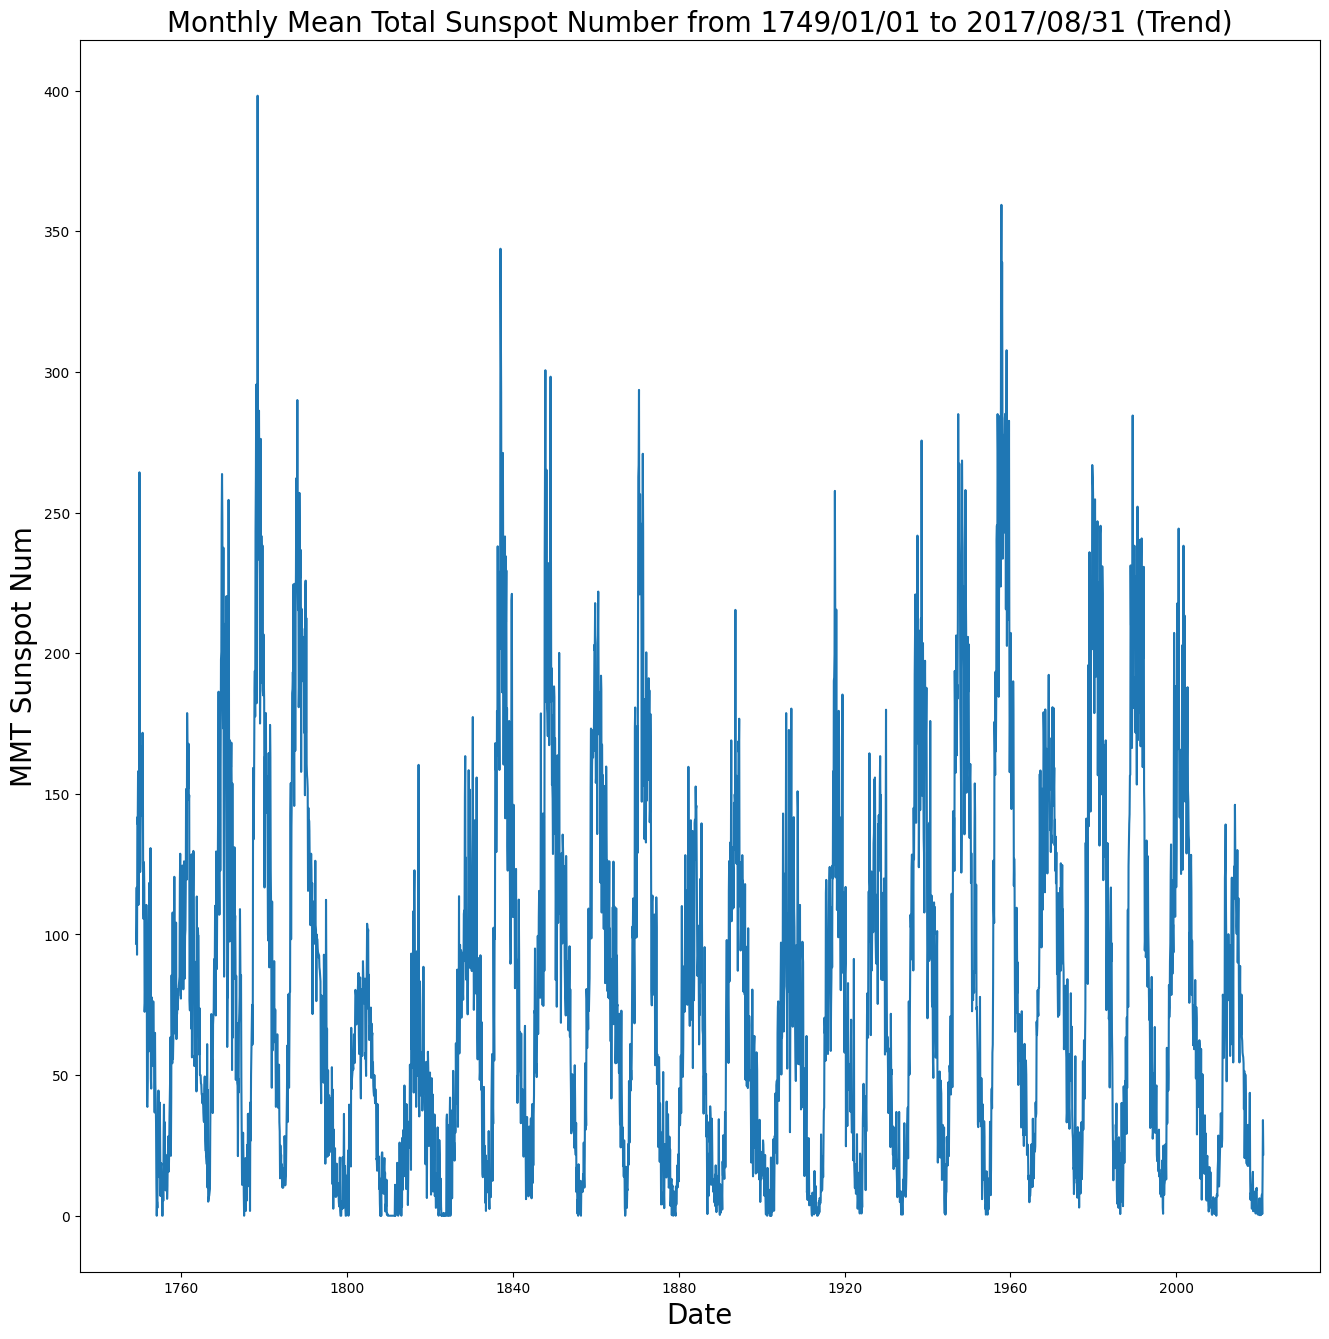

In [16]:
title_name = 'Monthly Mean Total Sunspot Number from 1749/01/01 to 2017/08/31'
plot_sunspot_num(df_entire, 0, df_entire.shape[0]-1, "Trend", title_name,
                 'MMT Sunspot Num')

### Yearly Plots (Seasonality)

In [17]:
yearly_df = df_entire.query("Date >= '2001-01-01' \
                       and Date <= '2002-01-01'")
yearly_df

,Monthly Mean Total Sunspot Number
Date,
2001-01-31,142.6
2001-02-28,121.5
2001-03-31,165.8
2001-04-30,161.7
2001-05-31,142.1
2001-06-30,202.9
2001-07-31,123.0
2001-08-31,161.5
2001-09-30,238.2


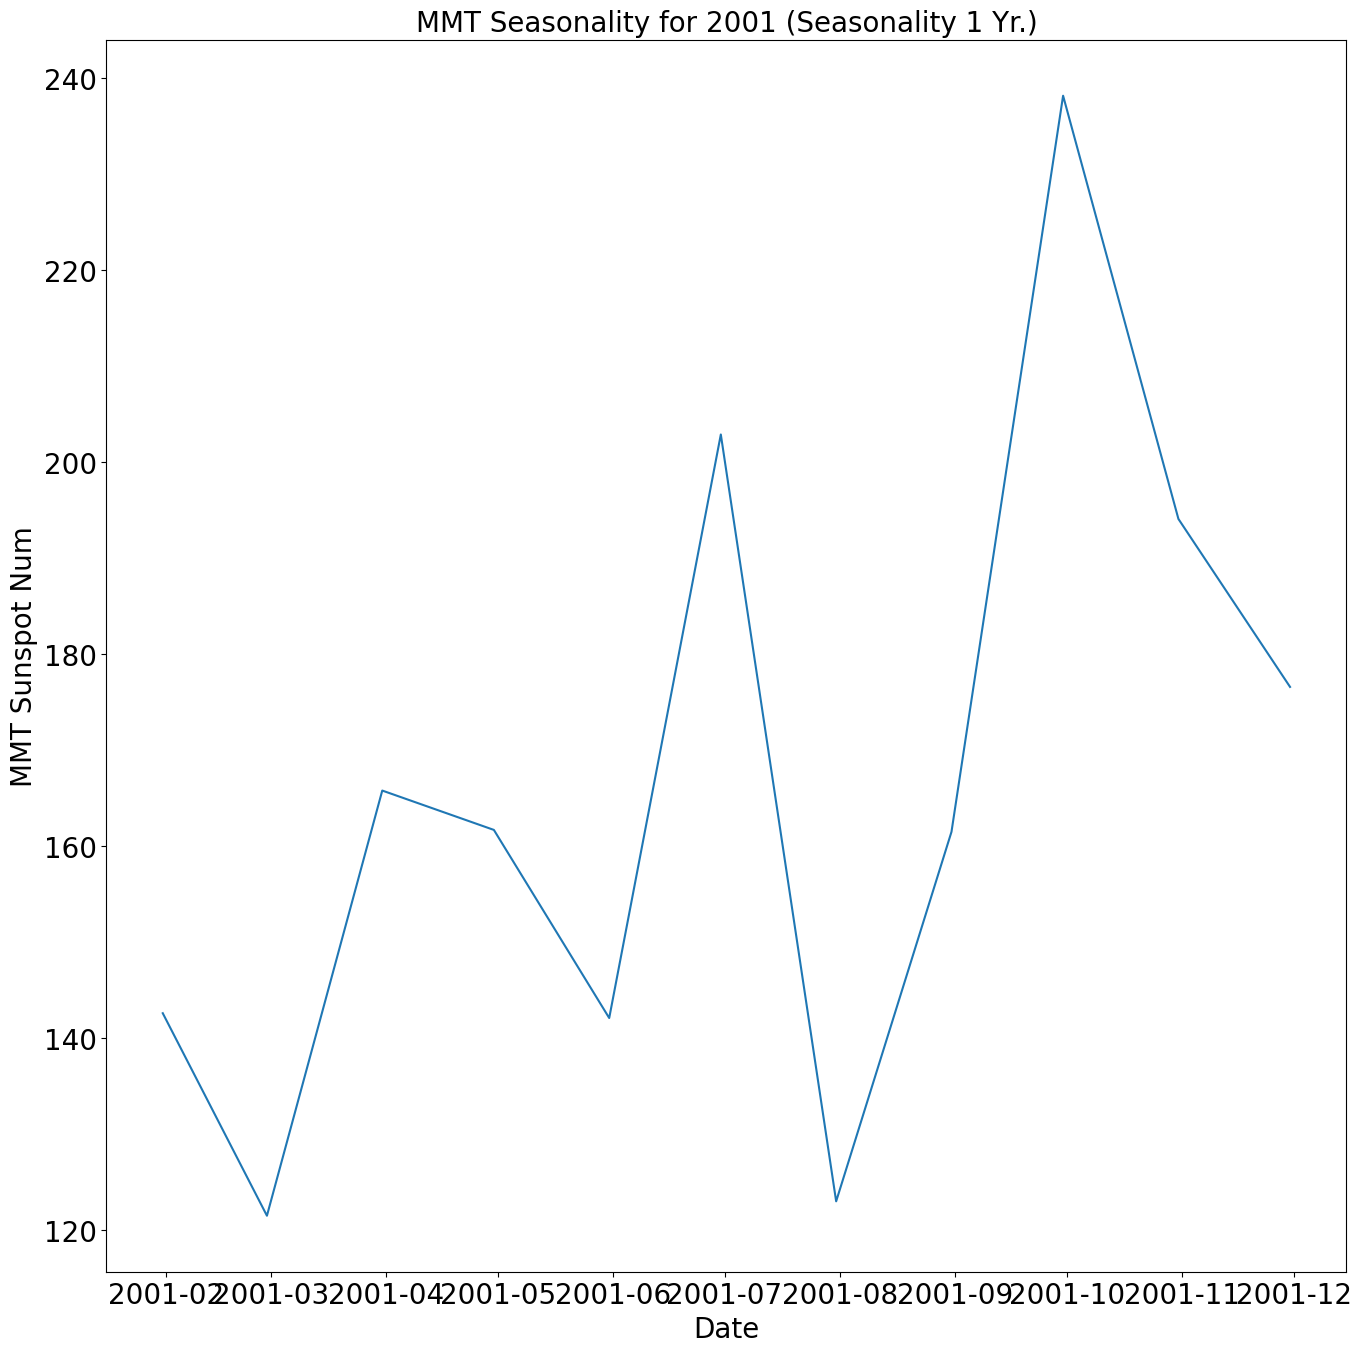

In [18]:
plot_sunspot_num(yearly_df, 0, yearly_df.shape[0]-1, "Seasonality 1 Yr.",
                 'MMT Seasonality for 2001', 'MMT Sunspot Num')

# Normalization Process

In [19]:
def get_scaler(scaler):
    scalers = {
        "minmax": MinMaxScaler,
        "standard": StandardScaler,
        "maxabs": MaxAbsScaler,
        "robust": RobustScaler,
    }
    return scalers.get(scaler.lower())()

def normalize_data(df):
    scaler_type = 'minmax'
    #scaler_type = input("Enter a scaler type (minmax,standard, maxabs, robust): ")
    if (scaler_type != 'minmax') and (scaler_type != 'standard') and (scaler_type != 'maxabs') and (scaler_type != 'robust'):
      runtime.unassign()

    scaler = get_scaler(scaler_type)
    normalized_data_MMT = scaler.fit_transform(df['Monthly Mean Total Sunspot Number'].
                                               values.reshape(-1,1))
    df['MMTSN_Norm'] = normalized_data_MMT
    return df, scaler

df_norm, scaler = normalize_data(df_entire)
df_norm_yr, scaler = normalize_data(yearly_df)

In [20]:
df_norm

,Monthly Mean Total Sunspot Number,MMTSN_Norm
Date,,
1749-01-31,96.7,0.242843
1749-02-28,104.3,0.261929
1749-03-31,116.7,0.293069
1749-04-30,92.8,0.233049
1749-05-31,141.7,0.355851
...,...,...
2020-09-30,0.6,0.001507
2020-10-31,14.4,0.036163
2020-11-30,34.0,0.085384


## Plot VMT, VHT, Q Normalized based on Trend and Seasonality.

Now after normalization we can observe that the data range on y-axis is 0.0 - 1.0.

### Trend Plot

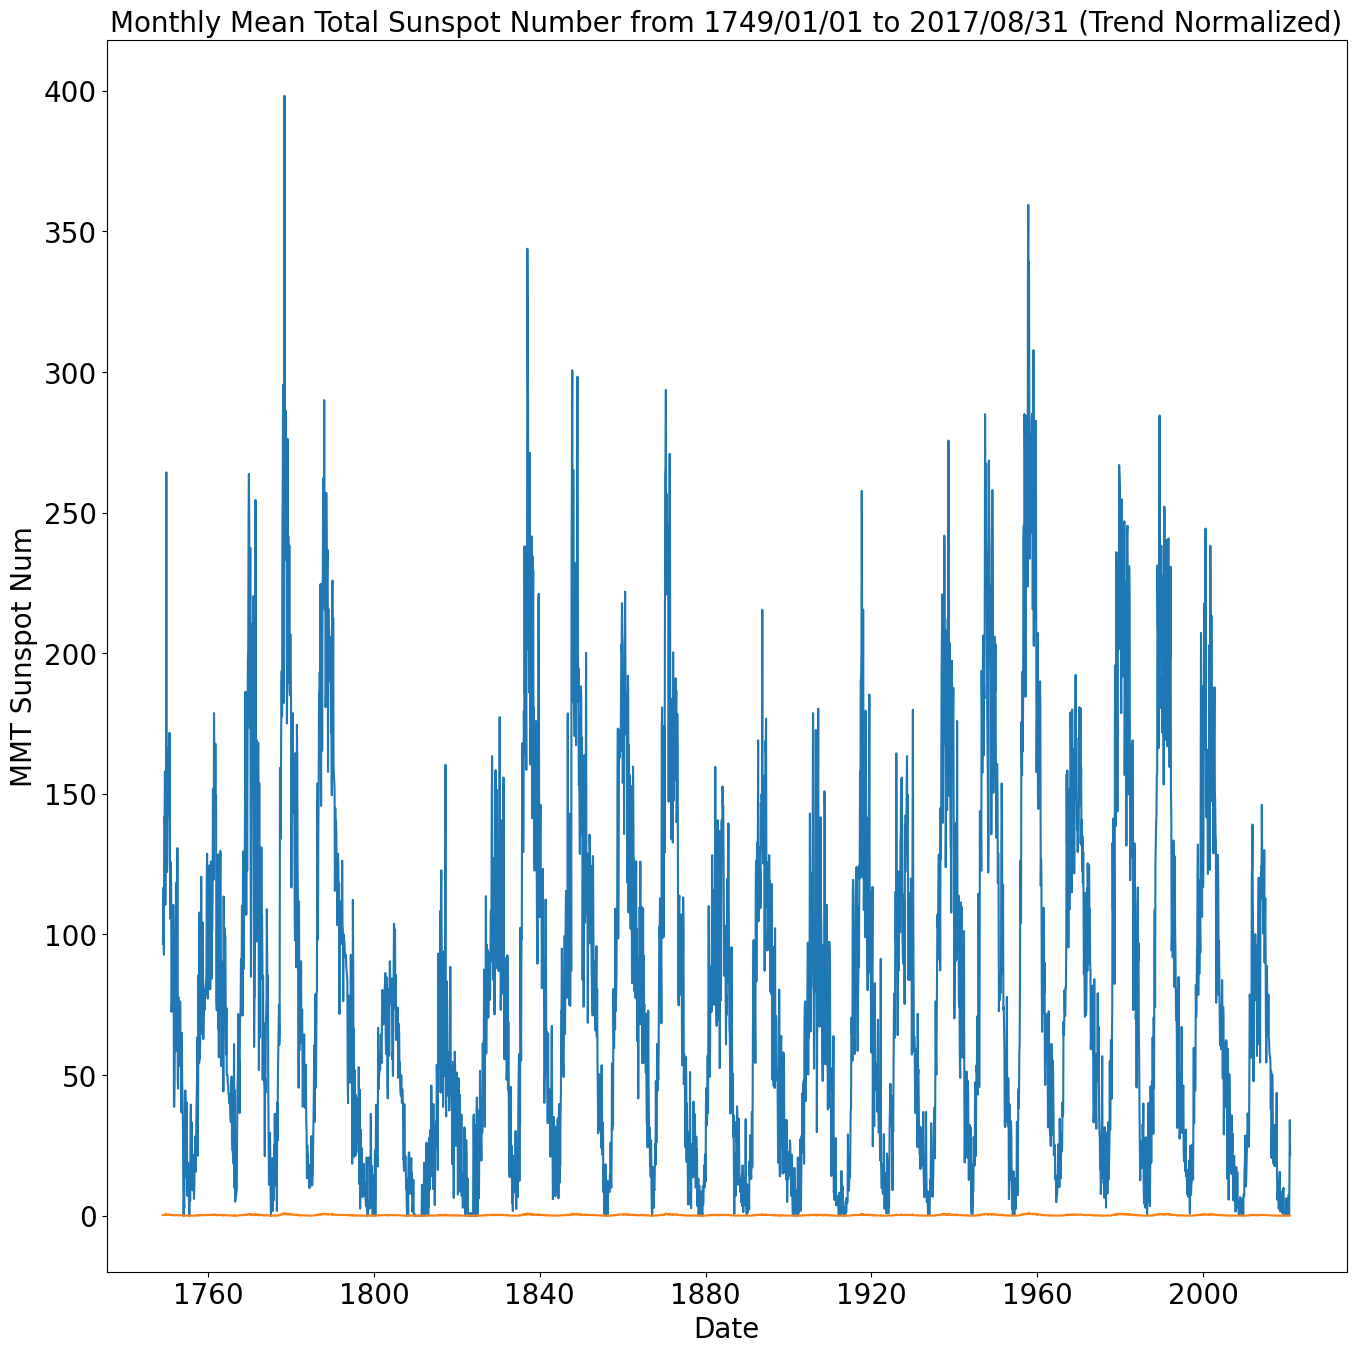

In [21]:
plot_sunspot_num(df_norm, 0, df_entire.shape[0]-1, "Trend Normalized", title_name,
                 'MMT Sunspot Num')

### Daily Plots (Seasonality)

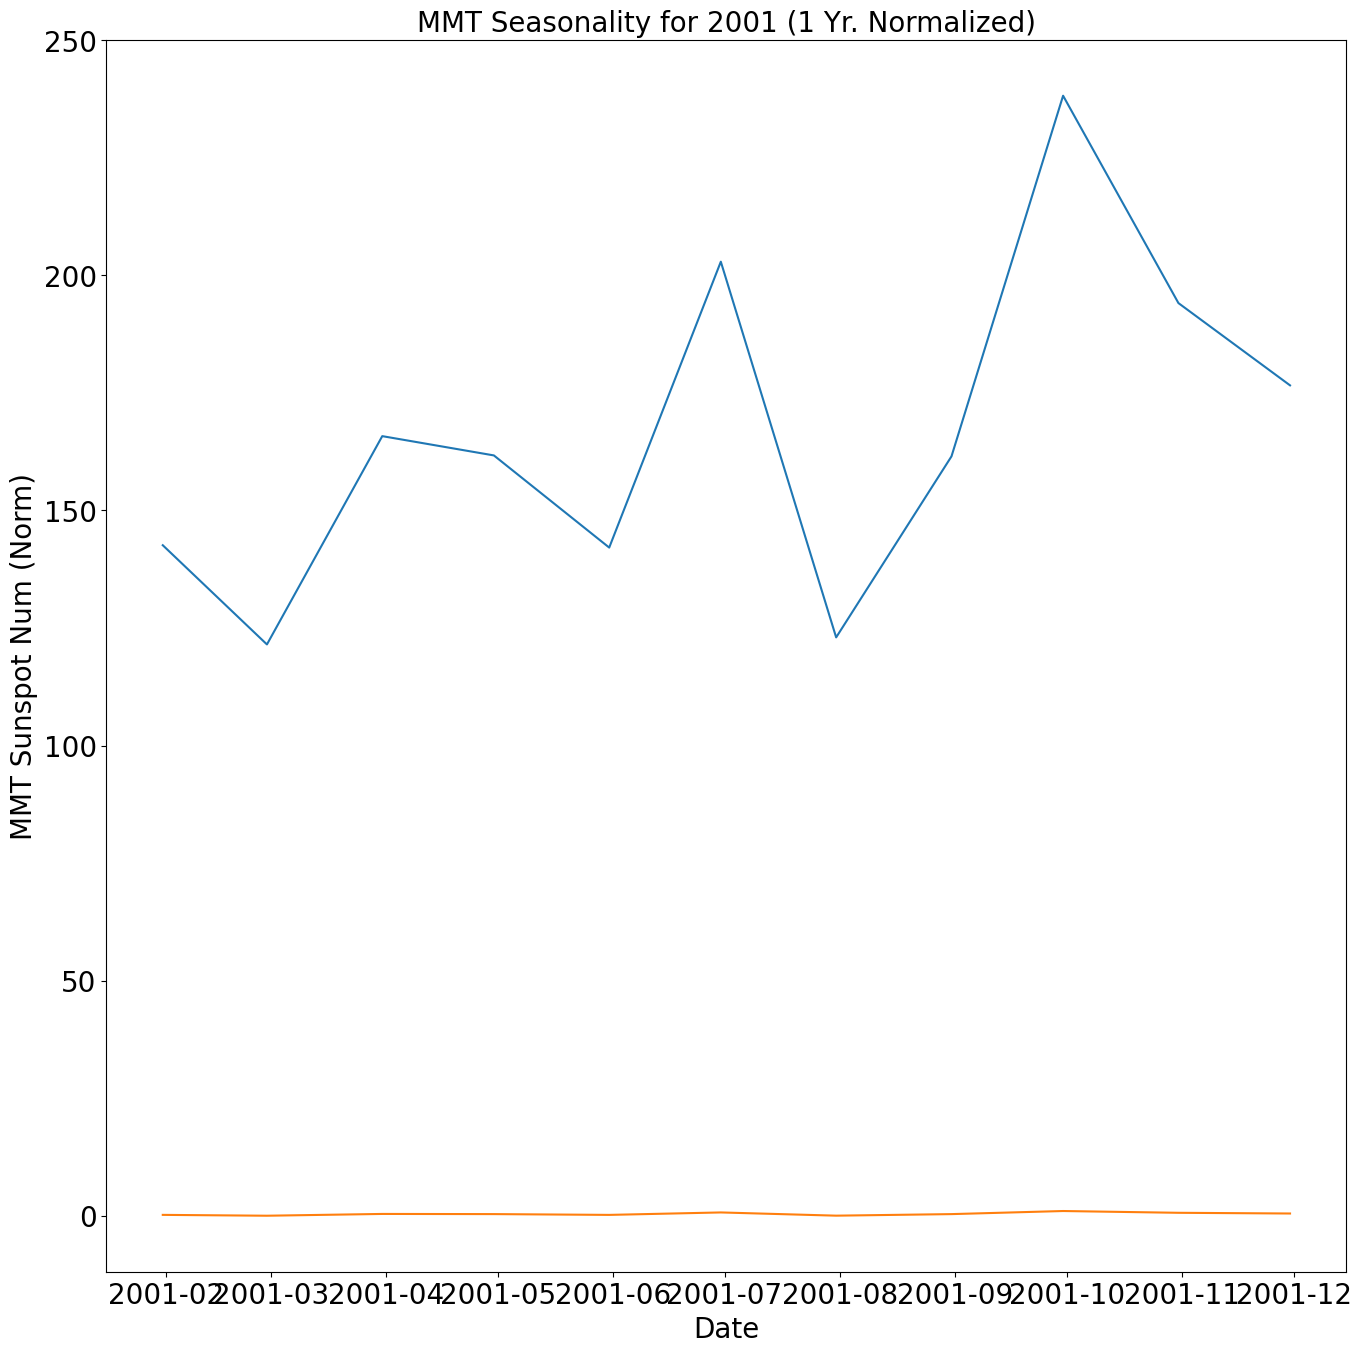

In [22]:
plot_sunspot_num(df_norm_yr, 0, df_norm_yr.shape[0]-1, "1 Yr. Normalized",
                  'MMT Seasonality for 2001', 'MMT Sunspot Num (Norm)')

# Let's observe train and test data on the graph

## Split into Train/Test Data.

In [23]:
test_size = 0.2 # Set Split rate to 3:1 (80 % Training 20 % Test).
split_pos = int(df_entire.shape[0]*(1 - test_size))
df_entire = df_entire.reset_index()
df_entire

,Date,Monthly Mean Total Sunspot Number,MMTSN_Norm
0,1749-01-31,96.7,0.242843
1,1749-02-28,104.3,0.261929
2,1749-03-31,116.7,0.293069
3,1749-04-30,92.8,0.233049
4,1749-05-31,141.7,0.355851
...,...,...,...
3260,2020-09-30,0.6,0.001507
3261,2020-10-31,14.4,0.036163
3262,2020-11-30,34.0,0.085384
3263,2020-12-31,21.8,0.054746


In [24]:
# 2019-02-06 will be the date seperation. Dates past this will be the test set.
split_date = str(df_entire.Date[split_pos])
#split_date = split_date[:10]
#DOM_train = df_norm.loc[df_norm.index <= split_date].copy()
DOM_train = df_entire.loc[df_norm.index <= split_date].copy()
#DOM_test = df_norm.loc[df_norm.index > split_date].copy()
DOM_test = df_entire.loc[df_norm.index > split_date].copy()
split_date

'1966-09-30 00:00:00'

## Plot Train/Test Split Graphs.

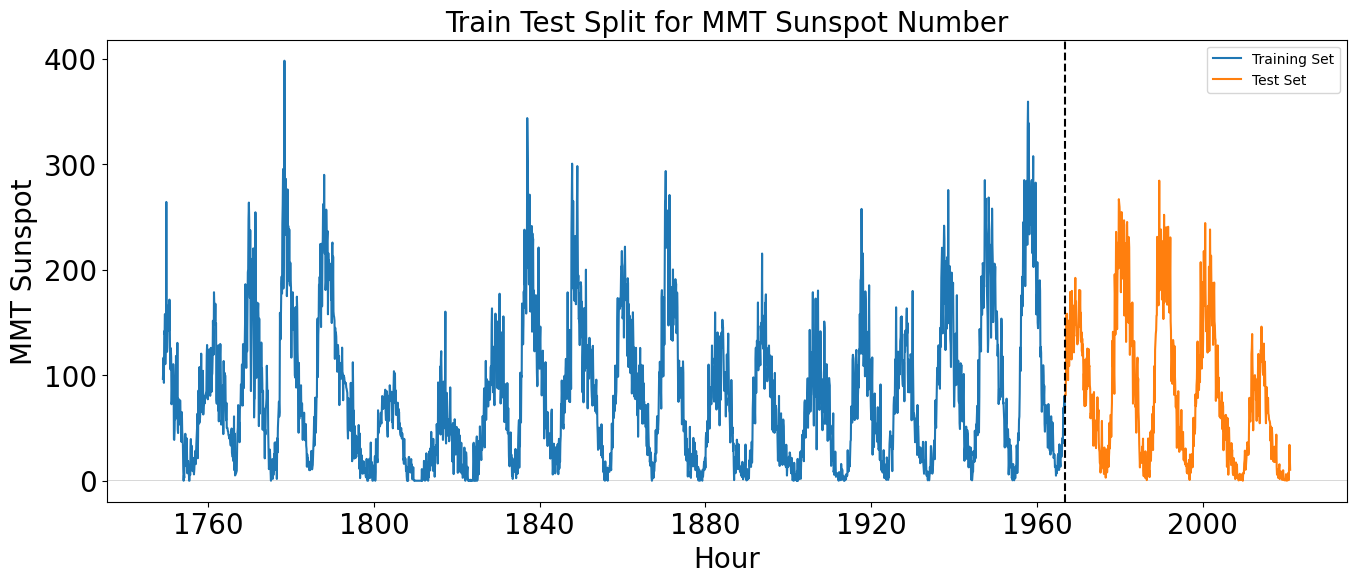

In [25]:
# Monthly Mean Total Sunspot Number Train Test Split
plt.figure(figsize=(16,6))
plt.plot(DOM_train['Date'], DOM_train['Monthly Mean Total Sunspot Number'],
         label='Training Set (Vehicle Miles)')
plt.plot(DOM_test['Date'], DOM_test['Monthly Mean Total Sunspot Number'],
         label='Testing Set (Vehicle Miles)')
plt.axvline(x = df_entire.Date[split_pos], color='black', ls='--')
plt.legend(['Training Set', 'Test Set'])
plt.axhspan(0, 1, facecolor='gray', alpha=0.3)
plt.xlabel("Hour", fontsize = 20)
plt.ylabel("MMT Sunspot", fontsize = 20)
plt.title("Train Test Split for MMT Sunspot Number", fontsize = 20)
plt.show()

In [26]:
# We index the Datetime column after transformation
df_entire.set_index('Date', inplace=True)
df_entire.head()

,Monthly Mean Total Sunspot Number,MMTSN_Norm
Date,,
1749-01-31,96.7,0.242843
1749-02-28,104.3,0.261929
1749-03-31,116.7,0.293069
1749-04-30,92.8,0.233049
1749-05-31,141.7,0.355851


In [27]:
df_entire1 = df_entire.drop(columns = ['MMTSN_Norm'])
df_entire1

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7
...,...
2020-09-30,0.6
2020-10-31,14.4
2020-11-30,34.0


In [28]:
df_entire2 = df_entire.drop(columns = ['Monthly Mean Total Sunspot Number'])
df_entire2

,MMTSN_Norm
Date,
1749-01-31,0.242843
1749-02-28,0.261929
1749-03-31,0.293069
1749-04-30,0.233049
1749-05-31,0.355851
...,...
2020-09-30,0.001507
2020-10-31,0.036163
2020-11-30,0.085384


# Prepare Data for Training the Models.

* With the following function block, let's set our data set as training and test data set in a model appropriate way

In [29]:
def load_data(data, seq_len):
    X_train = []
    y_train = []

    for i in range(seq_len, len(data)):
        X_train.append(data.iloc[i-seq_len : i, 0])
        y_train.append(data.iloc[i, 0])

    # last days are going to be used in test
    X_test = X_train[split_pos:]
    y_test = y_train[split_pos:]

    # first  days are going to be used in training
    X_train = X_train[:split_pos]
    y_train = y_train[:split_pos]

    # convert to numpy array
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # reshape data to input into RNN, LSTM, and GRU models
    X_train = np.reshape(X_train, (split_pos, seq_len, 1))
    X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

    return [X_train, y_train, X_test, y_test]

* **The seq_len** parameter determines how far back the model will look at historical data, helping the model to capture time dependencies in a memory-aware way.
* If "seq_len" is too large, the model can become complex and prone to overlearning.

In [30]:
feature = 'Monthly Mean Total Sunspot Number'
#selected_df = df_entire1
selected_df = df_entire2
feature_norm = 'MMT Sunspot (Norm)'
feature_field = 'MMT Sunspot'

In [31]:
seq_len = 20
#seq_len = 6*24*30

# Let's create train, test data
#X_train, y_train, X_test, y_test = load_data(df_vht, seq_len)
#X_train, y_train, X_test, y_test = load_data(df_vmt, seq_len)
X_train, y_train, X_test, y_test = load_data(selected_df, seq_len)
#X_train, y_train, X_test, y_test = load_data(df_norm2, seq_len)


print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (2612, 20, 1)
y_train.shape =  (2612,)
X_test.shape =  (633, 20, 1)
y_test.shape =  (633,)


In [32]:
X_train

array([[[0.24284279],
        [0.26192868],
        [0.29306881],
        ...,
        [0.41863385],
        [0.35735811],
        [0.43119036]],

       [[0.26192868],
        [0.29306881],
        [0.23304872],
        ...,
        [0.35735811],
        [0.43119036],
        [0.38171773]],

       [[0.29306881],
        [0.23304872],
        [0.35585133],
        ...,
        [0.43119036],
        [0.38171773],
        [0.27498744]],

       ...,

       [[0.17001507],
        [0.20140633],
        [0.18232044],
        ...,
        [0.33550979],
        [0.44952285],
        [0.4331994 ]],

       [[0.20140633],
        [0.18232044],
        [0.17855349],
        ...,
        [0.44952285],
        [0.4331994 ],
        [0.39804119]],

       [[0.18232044],
        [0.17855349],
        [0.20391763],
        ...,
        [0.4331994 ],
        [0.39804119],
        [0.32772476]]])

In [33]:
X_test

array([[[0.17855349],
        [0.20391763],
        [0.20341537],
        ...,
        [0.39804119],
        [0.32772476],
        [0.2887996 ]],

       [[0.20391763],
        [0.20341537],
        [0.25062783],
        ...,
        [0.32772476],
        [0.2887996 ],
        [0.45203415]],

       [[0.20341537],
        [0.25062783],
        [0.39427423],
        ...,
        [0.2887996 ],
        [0.45203415],
        [0.39226519]],

       ...,

       [[0.02360623],
        [0.02285284],
        [0.02486188],
        ...,
        [0.01883476],
        [0.00150678],
        [0.03616273]],

       [[0.02285284],
        [0.02486188],
        [0.00301356],
        ...,
        [0.00150678],
        [0.03616273],
        [0.08538423]],

       [[0.02486188],
        [0.00301356],
        [0.00226017],
        ...,
        [0.03616273],
        [0.08538423],
        [0.05474636]]])

In [34]:
y_train

array([0.38171773, 0.27498744, 0.26494224, ..., 0.39804119, 0.32772476,
       0.2887996 ])

In [35]:
y_test

array([4.52034154e-01, 3.92265193e-01, 3.42039176e-01, 3.88749372e-01,
       4.16875942e-01, 3.82973380e-01, 3.05625314e-01, 3.90507283e-01,
       3.71170266e-01, 4.28176796e-01, 4.82923154e-01, 3.79457559e-01,
       4.26670015e-01, 3.76946258e-01, 3.44299347e-01, 3.48568559e-01,
       3.24711200e-01, 3.40030136e-01, 3.32496233e-01, 3.48066298e-01,
       3.96534405e-01, 4.54043194e-01, 3.65896534e-01, 3.89502762e-01,
       4.53289804e-01, 3.79959819e-01, 4.00050226e-01, 3.30738322e-01,
       3.53591160e-01, 3.07885485e-01, 3.38523355e-01, 2.96835761e-01,
       3.24460070e-01, 2.80763435e-01, 2.15720743e-01, 2.55148167e-01,
       2.04671020e-01, 1.77548970e-01, 2.88046208e-01, 2.18483174e-01,
       1.79055751e-01, 1.84329483e-01, 2.24761426e-01, 2.92566549e-01,
       2.18483174e-01, 3.14665997e-01, 2.85032647e-01, 2.25012557e-01,
       2.86037167e-01, 3.13159216e-01, 2.71973882e-01, 2.73480663e-01,
       2.27774987e-01, 2.18232044e-01, 1.48669011e-01, 1.61476645e-01,
      

## Essential Variables.

In [36]:
epochs = 50
batch_size = 1000
#loss = 'MAE'
loss = 'MSE'
#activation = 'sigmoid'
activation = 'tanh'
#activation = 'relu'

## Training Loss vs. Epochs Plot

Plotting Accuracy and Validation Accuracy vs Epochs. Code taken from https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/.

In [37]:
def plot_training_loss(model, model_name):
    model.history.keys()
    plt.plot(model.history['loss'])
    plt.title('Training Loss vs. Epochs for {0}'.format(model_name))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

# LSTM model

## Create LSTM Model.

In [38]:
lstm_model = Sequential()

#lstm_model.add(LSTM(32,activation="relu",return_sequences=True,
#                   input_shape=(X_train.shape[1],1)))
lstm_model.add(LSTM(32,activation="relu",return_sequences=True,
                    input_shape=(100,1)))
lstm_model.add(Dropout(0.5))

#lstm_model.add(LSTM(32,activation="sigmoid",return_sequences=True))
#lstm_model.add(Dropout(0.5))

lstm_model.add(LSTM(60,activation="relu",return_sequences=False))
lstm_model.add(Dropout(0.5))

lstm_model.add(Dense(1))

lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 32)        │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60)             │        22,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,733 (104.43 KB)

 Trainable params: 26,733 (104.43 KB)

 Non-trainable params: 0 (0.00 B)

## Training LSTM Model.

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - loss: 0.0667
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - loss: 0.0529
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - loss: 0.0421
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - loss: 0.0302
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.0223
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.0200
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - loss: 0.0222
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.0185
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.0157
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.0168
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.0168
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - loss: 0.0150
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - loss: 0.0139
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - loss: 0.0137
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - loss: 0.0124
Epoch 16/50
3/3 ━━━

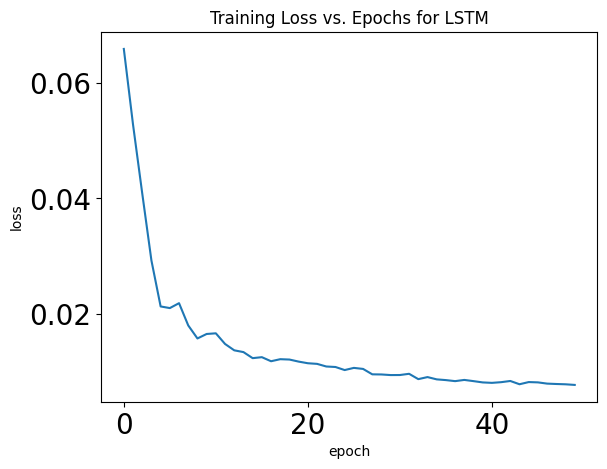

In [39]:
lstm_model.compile(optimizer="adam",loss=loss)
lstm_model_epochs = lstm_model.fit(X_train, y_train, epochs=epochs,
                           batch_size=batch_size)
plot_training_loss(lstm_model_epochs, "LSTM")

## Evaluate LSTM Model using MAE, RMSE, and R2.

In [40]:
print("RNN Predictions for Training Set")
lstm_predictions_train = lstm_model.predict(X_train)
print("RNN Predictions for Testing Set")
lstm_predictions_test = lstm_model.predict(X_test)
lstm_mae = mean_absolute_error(y_test,lstm_predictions_test)
print("MAE of RNN model = ",lstm_mae)
lstm_rmse =  mean_squared_error(y_test, lstm_predictions_test) ** 0.5
print("RMSE of RNN model = ", lstm_rmse)
#rnn_r2_score = r2_score(y_test,rnn_predictions_test)
#print("R2 Score of RNN model = ",rnn_r2_score)
lstm_mape_score = 100*mean_absolute_percentage_error(y_test,
                                                    lstm_predictions_test)
print("MAPE Score of RNN model = {0} %".format(lstm_mape_score))

RNN Predictions for Training Set
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
RNN Predictions for Testing Set
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
MAE of RNN model =  0.04823810430261472
RMSE of RNN model =  0.06764399431213093
MAPE Score of RNN model = 9596623211090.928 %


## Reverse Transform Scaler to Convert to Real Values.

In [41]:
y_train_inverse = scaler.inverse_transform(y_train.reshape(-1, 1))
lstm_predictions_inv_train = scaler.inverse_transform(lstm_predictions_train)

y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
lstm_predictions_inv_test = scaler.inverse_transform(lstm_predictions_test)

# Get values after inverse transformation
y_train_inverse = y_train_inverse.flatten()
lstm_predictions_inv_train = lstm_predictions_inv_train.flatten()

y_test_inverse = y_test_inverse.flatten()
lstm_predictions_inv_test = lstm_predictions_inv_test.flatten()

## Show Actual and Predicted y values as Dataframes.

### With Training Dates.

In [42]:
first_6169_index_dates = df_entire.index[:X_train.shape[0]]
results_LSTM_train = pd.DataFrame({"Date": first_6169_index_dates,
                                  'Actual': y_train_inverse,
                                  'Predicted': lstm_predictions_inv_train})
results_LSTM_train

,Date,Actual,Predicted
0,1749-01-31,166.046459,161.715500
1,1749-02-28,153.591035,161.512909
2,1749-03-31,152.418759,160.595123
3,1749-04-30,158.338749,159.251465
4,1749-05-31,155.701130,157.790375
...,...,...,...
2607,1966-04-30,173.959317,157.887146
2608,1966-05-31,172.054370,158.652512
2609,1966-06-30,167.951406,159.695572
2610,1966-07-31,159.745480,160.738815


### With Testing Dates.

In [43]:
last_6169_index_dates = df_entire.index[-X_test.shape[0]:]
results_LSTM_test = pd.DataFrame({"Date":last_6169_index_dates,
                                 'Actual': y_test_inverse,
                                 'Predicted': lstm_predictions_inv_test})
results_LSTM_test

,Date,Actual,Predicted
0,1968-05-31,174.252386,161.055313
1,1968-06-30,167.277348,161.389984
2,1968-07-31,161.415972,161.832275
3,1968-08-31,166.867052,161.886749
4,1968-09-30,170.149422,162.096069
...,...,...,...
628,2020-09-30,121.675841,123.165474
629,2020-10-31,125.720191,123.175919
630,2020-11-30,131.464340,123.242798
631,2020-12-31,127.888900,123.687439


## Plotting Predictions for Transmitted/Received Bytes made by LSTM Model.

### Only Testing Data.

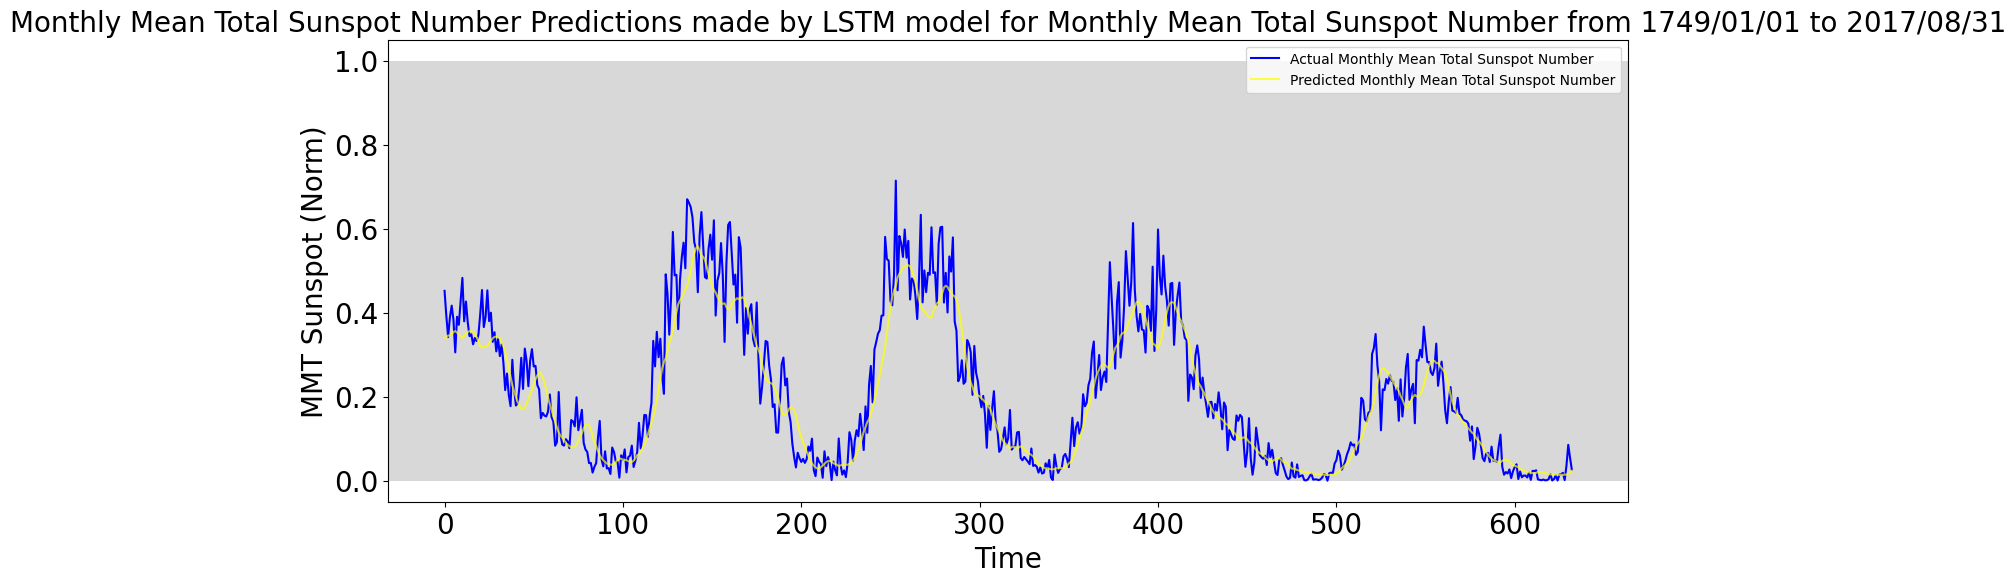

In [44]:
plt.figure(figsize=(16,6))
plt.plot(y_test, color='blue',label='Actual {0}'.format(feature))
plt.plot(lstm_predictions_test, alpha=0.7, color='yellow',
         label='Predicted {0}'.format(feature))
plt.axhspan(0, 1, facecolor='gray', alpha=0.3)
plt.title("{0} Predictions made by LSTM model for {1}".
          format(feature, title_name), fontsize = 20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=10)
plt.xlabel('Time', fontsize = 20)
plt.ylabel(feature_norm, fontsize = 20)
plt.legend()
plt.show()

### Training and Testing Data combined.

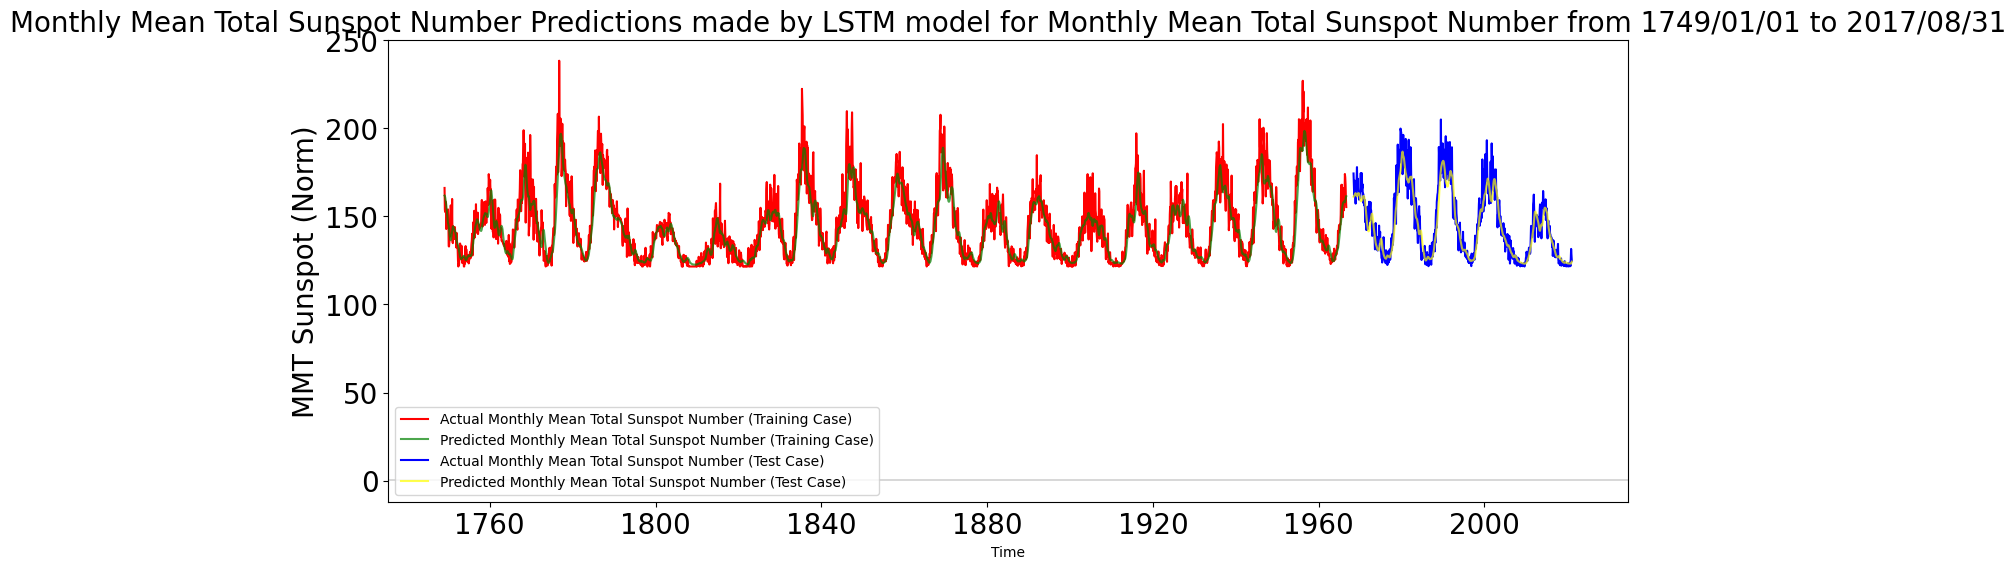

In [45]:
plt.figure(figsize=(16,6))
plt.plot(results_LSTM_train['Date'], results_LSTM_train['Actual'], color='red',
         label='Actual {0} (Training Case)'.format(feature))
plt.plot(results_LSTM_train['Date'], results_LSTM_train['Predicted'], alpha=0.7,
         color='green', label='Predicted {0} (Training Case)'.format(feature))
plt.plot(results_LSTM_test['Date'], results_LSTM_test['Actual'], color='blue',
         label='Actual {0} (Test Case)'.format(feature))
plt.plot(results_LSTM_test['Date'], results_LSTM_test['Predicted'], alpha=0.7,
         color='yellow', label='Predicted {0} (Test Case)'.format(feature))
plt.axhspan(0, 1, facecolor='gray', alpha=0.3)
plt.title("{0} Predictions made by LSTM model for {1}".
          format(feature, title_name), fontsize = 20)
plt.xlabel('Time', fontsize = 10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=10)
#plt.ylim([40, 70])
plt.ylabel(feature_norm, fontsize = 20)
plt.legend()
plt.show()

## Combine Actual and Predicted Results for Train and Test Cases for LSTM.

In [46]:
results_LSTM = [results_LSTM_train, results_LSTM_test]
results_LSTM = pd.concat(results_LSTM)
display(results_LSTM)

,Date,Actual,Predicted
0,1749-01-31,166.046459,161.715500
1,1749-02-28,153.591035,161.512909
2,1749-03-31,152.418759,160.595123
3,1749-04-30,158.338749,159.251465
4,1749-05-31,155.701130,157.790375
...,...,...,...
628,2020-09-30,121.675841,123.165474
629,2020-10-31,125.720191,123.175919
630,2020-11-30,131.464340,123.242798
631,2020-12-31,127.888900,123.687439


## Plotting Residuals for Actual and Predicted Results for RNN.

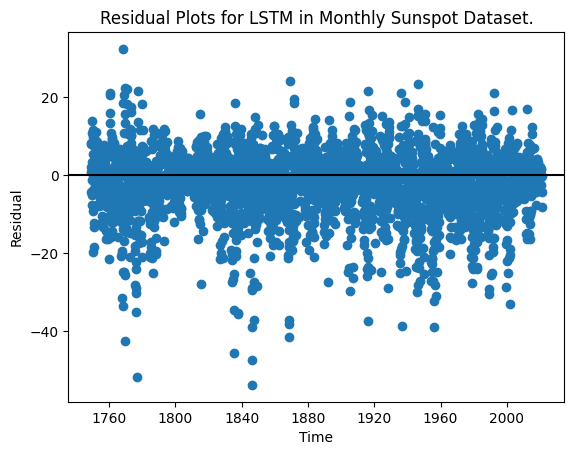

In [47]:
actual_arr_LSTM = np.array(results_LSTM['Actual'])
predicted_arr_LSTM = np.array(results_LSTM['Predicted'])
residuals_LSTM = predicted_arr_LSTM - actual_arr_LSTM
plt.scatter(results_LSTM['Date'], residuals_LSTM)
plt.axhline(y=0, color = 'black')
plt.title("Residual Plots for LSTM in Monthly Sunspot Dataset.")
#plt.locator_params(axis='x', nbins=10)
#plt.locator_params(axis='y', nbins=10)
#plt.ylim([40, 70])
plt.xlabel("Time")
plt.ylabel("Residual")
plt.show()

From the residual plots for the RNN model, it can be concluded that the RNN model is a good fit.

## Energy Consumption

In [48]:
# estimate model energy
#energy_lstm = keras_spiking.ModelEnergy(lstm_model)
#energy_lstm.summary(print_warnings=False)

In [49]:
#energy_lstm.summary(
#    columns=(
#        "name",
#        "energy cpu",
#        "energy gpu",
#        "synop_energy cpu",
#        "synop_energy gpu",
#        "neuron_energy cpu",
#        "neuron_energy gpu",
#    ),
#    print_warnings=False,
#)

# Dense SNN Model.

## Create SNN Model.

### Spiking Activation Layer

In [50]:
class SpikingActivationCell(tf.keras.layers.Layer):
    def __init__(self, activation='tanh', threshold=1.0, dt=1.0, spiking_aware_training=False, **kwargs):
        super(SpikingActivationCell, self).__init__(**kwargs)
        self.activation = activation
        self.threshold = threshold
        self.dt = dt
        self.spiking_aware_training = spiking_aware_training
        self.state_size = 1  # State to store membrane potential

    def build(self, input_shape):
        self.membrane_potential = self.add_weight(
            name='membrane_potential',
            shape=(input_shape[-1],),
            initializer='zeros',
            trainable=False
        )
        super(SpikingActivationCell, self).build(input_shape)

    def call(self, inputs, states, training=None):
        prev_membrane_potential = states[0]

        # Apply activation function
        activated_input = tf.keras.activations.get(self.activation)(inputs)

        # Update membrane potential
        membrane_potential = prev_membrane_potential + activated_input * self.dt

        # Generate spikes based on threshold
        if training and self.spiking_aware_training:
            # Use a surrogate gradient during training
            # This is a common surrogate gradient (Heaviside step function with identity gradient)
            spikes = tf.where(membrane_potential >= self.threshold,
                              tf.ones_like(membrane_potential),
                              tf.zeros_like(membrane_potential))
            # Define the surrogate gradient
            @tf.custom_gradient
            def surrogate_spike(x):
                spike = tf.where(x >= self.threshold, tf.ones_like(x), tf.zeros_like(x))
                def grad(dy):
                    # Here we use an identity gradient for simplicity, you might use others
                    return dy
                return spike, grad
            spikes = surrogate_spike(membrane_potential)
        else:
            # Use standard spiking during inference/evaluation
            spikes = tf.cast(membrane_potential >= self.threshold, dtype=tf.float32)

        # Reset membrane potential after spike
        membrane_potential = membrane_potential - spikes * self.threshold

        # Return the spikes and the updated membrane potential as the new state
        return spikes, [membrane_potential]

class SpikingActivationLayer(tf.keras.layers.RNN):
    def __init__(self, activation='tanh', threshold=1.0, dt=1.0, spiking_aware_training=False, **kwargs):
        cell = SpikingActivationCell(activation=activation, threshold=threshold,
                                     dt=dt, spiking_aware_training=spiking_aware_training)
        super(SpikingActivationLayer, self).__init__(cell, **kwargs)

    def call(self, inputs, initial_state=None, training=None, **kwargs):
        # Get the input shape
        input_shape = tf.shape(inputs)
        batch_size = input_shape[0]
        num_features = input_shape[-1]

        # Initialize the state if it's not provided
        if initial_state is None:
            # The initial state for the cell is a list of tensors. Since state_size is 1,
            # the initial state should be a list containing one tensor.
            initial_state = [tf.zeros((batch_size, num_features), dtype=tf.float32)]

        # Call the RNN with the correct initial state and training flag
        # The training flag from the layer's call method is passed to the cell's call method
        return super(SpikingActivationLayer, self).call(inputs,
                                                        initial_state=initial_state,
                                                        training=training,
                                                        **kwargs)

    # This method is usually called internally by Keras to determine the shape
    # of the output tensor. It should align with the arguments received in the
    # `call()` method. Based on the error, the argument `sequences_shape` should
    # be aligned with the `inputs` argument of `call()`.
    def compute_output_shape(self, input_shape):
        return input_shape

    # Override the build method to accept and ignore the sequences_shape argument
    # This is often not needed for RNN layers that handle variable length sequences,
    # but keeping it here for consistency with your original code structure.
    def build(self, input_shape):
        # Call the parent class's build method, passing only the input_shape
        super(SpikingActivationLayer, self).build(input_shape)

### Spiking Model

In [51]:
spiking_model = tf.keras.Sequential(
    [
        # Add temporal dimension to the input shape; we can set it to None,
        # to allow the model to flexibly run for different lengths of time
        tf.keras.layers.Reshape((-1, X_train.shape[1]),
                                input_shape=(None, X_train.shape[1])),
        # Use Keras' TimeDistributed wrapper to allow Dense layer to operate
        # on temporal data.
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128)),
        # Replace the "tanh" activation in the non-spiking model with a
        # spiking equivalent
        SpikingActivationLayer(activation='tanh', threshold=50, dt=100,
                               return_sequences=True,
                               spiking_aware_training=True),
        # use average pooling layer to average spiking output over time
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(1),
    ]
)

spiking_model.compile(optimizer="adam", loss=loss)
spiking_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, None, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, None, 128)      │         2,688 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spiking_activation_layer        │ (None, None, 128)      │           128 │
│ (SpikingActivationLayer)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 128 (512.00 B)

## Training Spiking Model.

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0869
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0724
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0574 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0478
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0442
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0490 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0572
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0737 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0903
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0932
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0926 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0934
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0866
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0751
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0681
Epoch 16/50
3/3 ━━━━━━━━━━━━━━

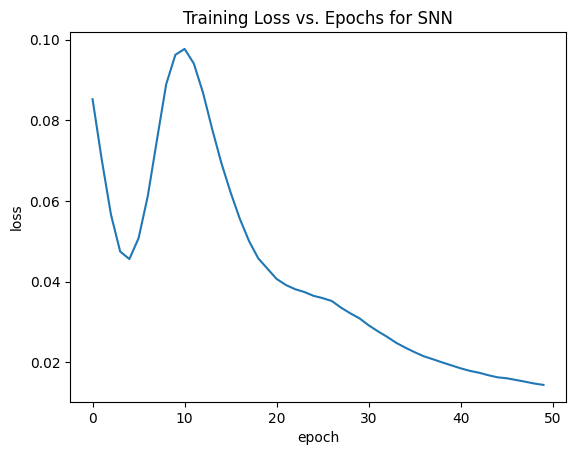

In [52]:
snn_model_epochs = spiking_model.fit(X_train, y_train, epochs=epochs,
                                     batch_size=batch_size)
plot_training_loss(snn_model_epochs, "SNN")

## Evaluate SNN Model using MAE, RMSE, and R2.

In [53]:
print("SNN Predictions for Training Set")
spiking_pred_train = spiking_model.predict(X_train)
print("SNN Predictions for Testing Set")
spiking_pred_test = spiking_model.predict(X_test)
spiking_mae = mean_absolute_error(y_test, spiking_pred_test)
print("MAE of SNN model = ", spiking_mae)
spiking_rmse =  mean_squared_error(y_test, spiking_pred_test) ** 0.5
print("RMSE of SNN model = ",spiking_rmse)
spiking_mape_score = 100*mean_absolute_percentage_error(y_test,
                                                        spiking_pred_test)
print("MAPE Score of SNN model = {0} %".format(spiking_mape_score))

SNN Predictions for Training Set
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
SNN Predictions for Testing Set
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MAE of SNN model =  0.084301072173142
RMSE of SNN model =  0.11533042333975782
MAPE Score of SNN model = 55528513901220.22 %


## Reverse Transform Scaler to Convert to Real Values.

In [54]:
y_train_inverse = scaler.inverse_transform(y_train.reshape(-1, 1))
snn_pred_inv_train = scaler.inverse_transform(spiking_pred_train)

y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
snn_pred_inv_test = scaler.inverse_transform(spiking_pred_test)

# Get values after inverse transformation
y_train_inverse = y_train_inverse.flatten()
snn_pred_inv_train = snn_pred_inv_train.flatten()

y_test_inverse = y_test_inverse.flatten()
snn_pred_inv_test = snn_pred_inv_test.flatten()

## Show Actual and Predicted y values as Dataframes.

### With Training Dates.

In [55]:
first_6169_index_dates = df_entire.index[:X_train.shape[0]]
results_SNN_train = pd.DataFrame({"Date": first_6169_index_dates,
                                  'Actual': y_train_inverse,
                                  'Predicted': snn_pred_inv_train})
results_SNN_train

,Date,Actual,Predicted
0,1749-01-31,166.046459,160.816788
1,1749-02-28,153.591035,160.816788
2,1749-03-31,152.418759,171.312103
3,1749-04-30,158.338749,153.914230
4,1749-05-31,155.701130,151.862411
...,...,...,...
2607,1966-04-30,173.959317,153.914230
2608,1966-05-31,172.054370,139.344223
2609,1966-06-30,167.951406,153.914230
2610,1966-07-31,159.745480,153.914230


### With Testing Dates.

In [56]:
last_6169_index_dates = df_entire.index[-X_test.shape[0]:]
results_SNN_test = pd.DataFrame({"Date":last_6169_index_dates,
                                 'Actual': y_test_inverse,
                                 'Predicted': snn_pred_inv_test})
results_SNN_test

,Date,Actual,Predicted
0,1968-05-31,174.252386,166.432404
1,1968-06-30,167.277348,151.862411
2,1968-07-31,161.415972,166.432404
3,1968-08-31,166.867052,151.862411
4,1968-09-30,170.149422,171.312103
...,...,...,...
628,2020-09-30,121.675841,130.608170
629,2020-10-31,125.720191,130.608170
630,2020-11-30,131.464340,130.608170
631,2020-12-31,127.888900,130.608170


## Plotting Predictions for Transmitted/Received Bytes made by SNN Model.

### Only Testing Data

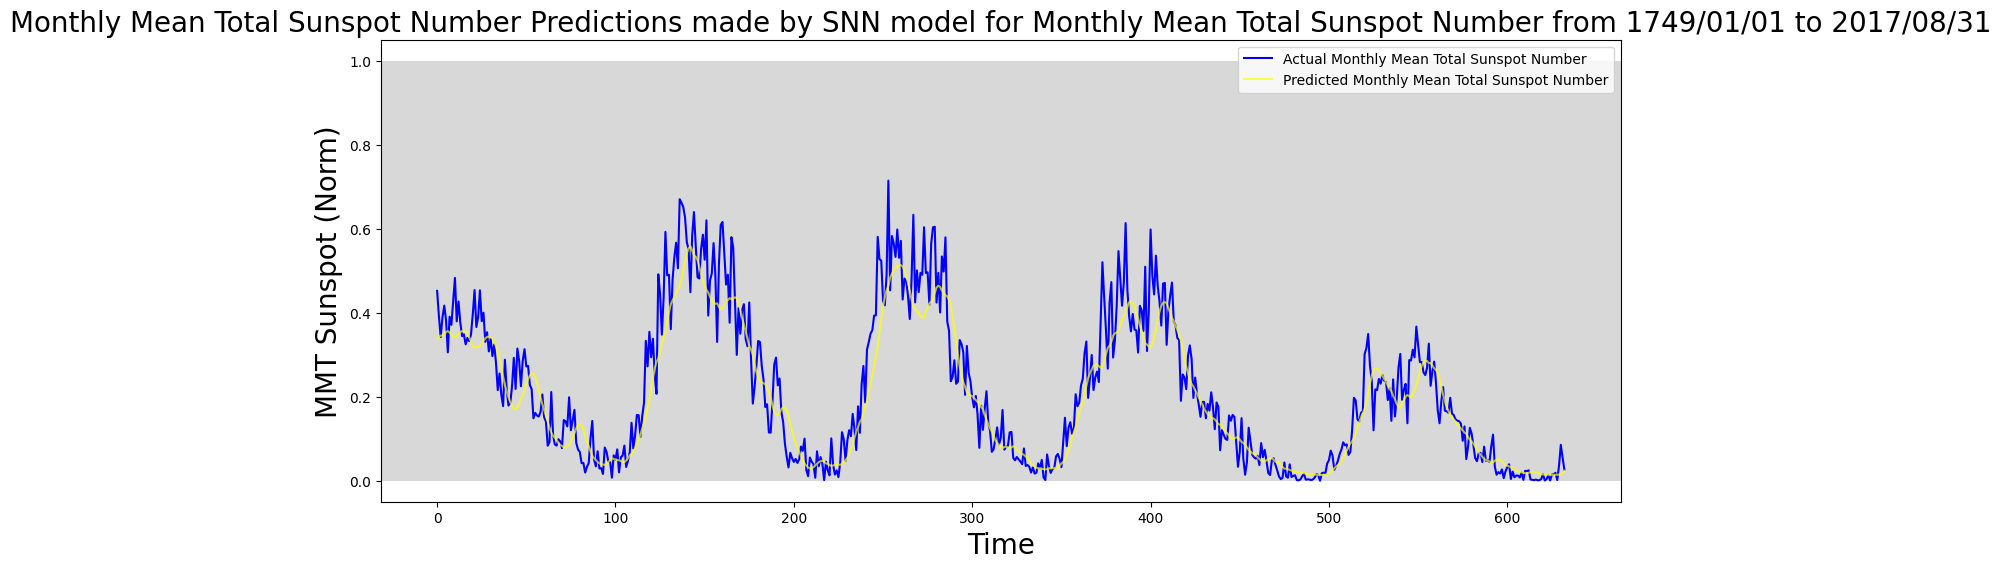

In [57]:
plt.figure(figsize=(16,6))
plt.plot(y_test, color='blue',label='Actual {0}'.format(feature))
plt.plot(lstm_predictions_test, alpha=0.7, color='yellow',
         label='Predicted {0}'.format(feature))
plt.axhspan(0, 1, facecolor='gray', alpha=0.3)
plt.title("{0} Predictions made by SNN model for {1}".
          format(feature, title_name), fontsize = 20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=10)
plt.xlabel('Time', fontsize = 20)
plt.ylabel(feature_norm, fontsize = 20)
plt.legend()
plt.show()

### Testing and Training Data Combined.

## Combine Actual and Predicted Results for Train and Test Cases for SNN.

In [58]:
results_SNN = [results_SNN_train, results_SNN_test]
results_SNN = pd.concat(results_SNN)
display(results_SNN)

,Date,Actual,Predicted
0,1749-01-31,166.046459,160.816788
1,1749-02-28,153.591035,160.816788
2,1749-03-31,152.418759,171.312103
3,1749-04-30,158.338749,153.914230
4,1749-05-31,155.701130,151.862411
...,...,...,...
628,2020-09-30,121.675841,130.608170
629,2020-10-31,125.720191,130.608170
630,2020-11-30,131.464340,130.608170
631,2020-12-31,127.888900,130.608170


## Plot Output Spikes.

Code taken from https://r-gaurav.github.io/2021/03/07/Spiking-Neural-Nets-for-Image-Classification-in-Nengo-DL.html

In [59]:
def check_output(seq_model, X_train, X_test, y_train, y_test, modify_dt=0.01):
    """
    This code is used to show the plot of the output spikes
    """

    # repeat the outputs for n_steps
    n_steps = 50
    train_sequences = np.tile(X_train[:, None], (1, n_steps, 1, 1))
    test_sequences = np.tile(X_test[:, None], (1, n_steps, 1, 1))

    # rebuild the model with the functional API to access the output of
    # intermediate layers.
    inp = x = tf.keras.Input(batch_shape=seq_model.layers[0].input_shape)
    has_global_average_pooling = False
    # Obtain list of layers. Want to create a spike matrix.
    spikes_dict = {}
    layer_names = []
    print("length of seq_model.layers: ", len(seq_model.layers))
    for layer in seq_model.layers:
        print("layer name: ", layer.name)
        print("layer type: ", type(layer))
        layer_names.append(str(layer.name))
        if isinstance(layer, tf.keras.layers.GlobalAveragePooling1D):
            # remove the pooling so that we can see the model's
            # output over time
            has_global_average_pooling = True
            continue

        if isinstance(layer, (keras_spiking.SpikingActivation,
                              keras_spiking.Lowpass)):
            cfg = layer.get_config()
            # update dt, if specified
            if modify_dt is not None:
                cfg["dt"] = modify_dt
            # return the full time series for visualization
            cfg["return_sequences"] = True

            layer = type(layer)(**cfg)

        if isinstance(layer, keras_spiking.SpikingActivation):
            # save this layer so we can access it later
            spike_layer = layer

        x = layer(x)

    # Initialize spikes_dict with layer names as keys
    for layer_name in layer_names:
        spikes_dict[layer_name] = np.array([]) # Initialize as empty array

    layer_names.append("Output")
    spikes_dict["Output"] = np.array([])

    # Take a look at Spiking Activation Layer.
    func_model = tf.keras.Model(inp, [x, spike_layer.output])

    # copy weights to new model
    func_model.set_weights(seq_model.get_weights())

    # run model
    output, spikes = func_model.predict(test_sequences)
    spikes = np.transpose(spikes, (0, 2, 1))
    print("spikes.shape: ", spikes.shape)

    # Iterate through layer list
    for i in range(spikes.shape[0]):
      for j in range(len(layer_names)):
        # Append spike data for each layer, handling potential empty arrays
        if spikes_dict[layer_names[j]].size == 0:
            spikes_dict[layer_names[j]] = spikes[i][j]
        else:
            spikes_dict[layer_names[j]] = np.concatenate((spikes_dict[layer_names[j]],
                                                    spikes[i][j]), axis = 0)

    print("spikes_dict: ", spikes_dict)

    if has_global_average_pooling:
        # check test accuracy using average output over all timesteps
        predictions = np.argmax(output.mean(axis=1), axis=-1)
    else:
        # check test accuracy using output from only the last timestep
        predictions = np.argmax(output[:, -1], axis=-1)

    print("spike_layer.dt: ", spike_layer.dt)
    # Evaluate Test Data
    seq_model_mae = mean_absolute_error(y_test, spiking_pred_test)
    print("MAE of seq_model = ", seq_model_mae)
    seq_model_rmse = mean_absolute_error(y_test, spiking_pred_test)**0.5
    print("RMSE of seq_model = ", seq_model_rmse)
    seq_model_mape = 100*mean_absolute_percentage_error(y_test, spiking_pred_test)
    print("MAPE of seq_model = ", seq_model_mape)

    # Start Output Spike Plot.
    num_neurons = 5
    print("spikes for spiking_activation: ", spikes_dict['spiking_activation'])
    spikes_matrix = spikes_dict['spiking_activation']*20*modify_dt
    print("spikes_matrix.shape: ", spikes_matrix.shape)
    spikes_matrix = spikes_matrix.reshape(spikes.shape[0], n_steps)
    print("spikes_matrix.shape: ", spikes_matrix.shape)
    neurons = np.random.choice(spikes_matrix.shape[1], num_neurons, replace=True)
    print("neurons: ", neurons)
    print("neurons.shape: ", neurons.shape)

    fig, ax = plt.subplots(figsize=(14, 12), facecolor="#00FFFF")
    color = cm.get_cmap('tab10')(0)
    timesteps = np.arange(n_steps)
    print("timesteps shape: ", timesteps.shape)
    print("timesteps: {0}".format(timesteps))

    # Change here: iterate over the correct range of columns
    for neuron_index in range(spikes_matrix.shape[1]):
        indices = np.where(spikes_matrix[:, neuron_index] != 0)[0]
        # Get indices for non-zero elements along axis 0
        print("list of indices: ", indices)

        # Filter indices to be within the bounds of timesteps
        valid_indices = indices[indices < len(timesteps)]

        for t in timesteps[valid_indices]:
            # Use the current neuron_index for the y-axis position
            ax.plot([t, t], [neuron_index + 0.5, neuron_index + 1.5], color=color)


    ax.set_ylim(0.5, num_neurons+0.5)
    ax.set_yticks(list(range(1, num_neurons+1, int(np.ceil(num_neurons/50)))))
    ax.set_xticks(list(range(1, n_steps+1, 10)))
    ax.set_ylabel("Neuron Index")
    ax.set_xlabel("Time ($ms$) or Spikes")
    ax.set_title("Spikes Plot: Dense Spiking Activation Layer")

In [60]:
#check_output(spiking_model, X_train, X_test, y_train, y_test)

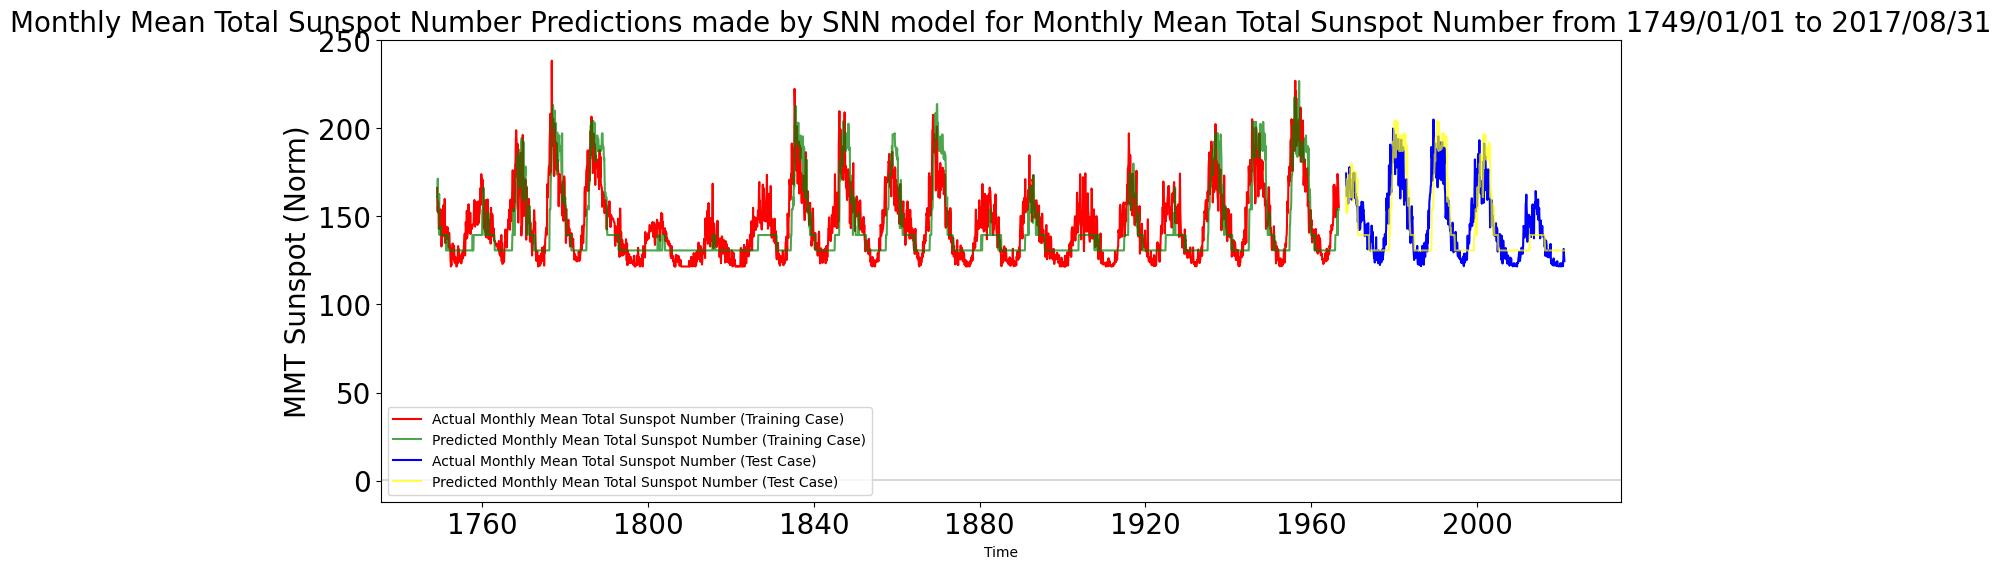

In [61]:
plt.figure(figsize=(16,6))
plt.plot(results_SNN_train['Date'], results_SNN_train['Actual'], color='red',
         label='Actual {0} (Training Case)'.format(feature))
plt.plot(results_SNN_train['Date'], results_SNN_train['Predicted'], alpha=0.7,
         color='green', label='Predicted {0} (Training Case)'.format(feature))
plt.plot(results_SNN_test['Date'], results_SNN_test['Actual'], color='blue',
         label='Actual {0} (Test Case)'.format(feature))
plt.plot(results_SNN_test['Date'], results_SNN_test['Predicted'], alpha=0.7,
         color='yellow', label='Predicted {0} (Test Case)'.format(feature))
plt.axhspan(0, 1, facecolor='gray', alpha=0.3)
plt.title("{0} Predictions made by SNN model for {1}".
          format(feature, title_name), fontsize = 20)
plt.xlabel('Time', fontsize = 10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=10)
#plt.ylim([40, 70])
plt.ylabel(feature_norm, fontsize = 20)
plt.legend()
plt.show()

## Plotting Residuals for Actual and Predicted Results for SNN.

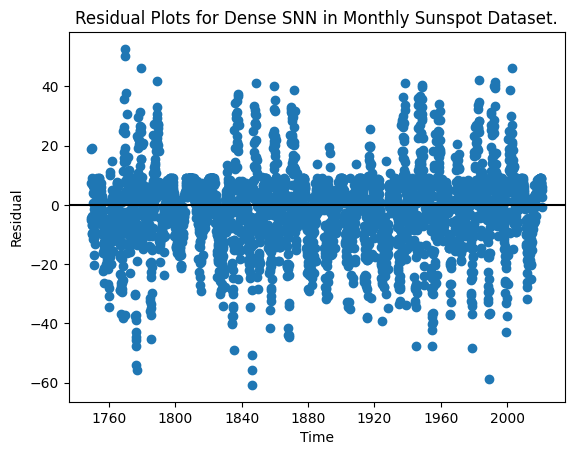

In [62]:
actual_arr_SNN = np.array(results_SNN['Actual'])
predicted_arr_SNN = np.array(results_SNN['Predicted'])
residuals_SNN = predicted_arr_SNN - actual_arr_SNN
plt.scatter(results_SNN['Date'], residuals_SNN)
plt.axhline(y=0, color = 'black')
plt.title("Residual Plots for SNN in Monthly Sunspot Dataset.")
#plt.locator_params(axis='x', nbins=10)
#plt.locator_params(axis='y', nbins=10)
#plt.ylim([40, 70])
plt.xlabel("Time")
plt.ylabel("Residual")
plt.show()

## Energy Consumption.

In [63]:
# estimate model energy
#energy_spiking = keras_spiking.ModelEnergy(spiking_model)
#energy_spiking.summary(print_warnings=False)

In [64]:
#energy_spiking.summary(
 #   columns=(
#        "name",
#        "energy cpu",
#        "energy gpu",
#        "synop_energy cpu",
#        "synop_energy gpu",
#        "neuron_energy cpu",
#        "neuron_energy gpu",
#    ),
#    print_warnings=False,
#)

# CNN-LSTM (Hybrid DNN) Model

## Create CNN-LSTM Model

In [65]:
cnn_lstm_model = Sequential()

#cnn_lstm_model.add(Conv1D(filters=6, kernel_size=5, activation='tanh',
#                          input_shape=(seq_len, X_train.shape[2])))
cnn_lstm_model.add(Conv1D(filters=32, kernel_size=2, activation='tanh',
                          input_shape=(100, X_train.shape[2])))
cnn_lstm_model.add(MaxPooling1D(pool_size=2))

#cnn_lstm_model.add(Conv1D(filters=6, kernel_size=5, activation='tanh',
#                          input_shape=(seq_len, X_train.shape[2])))
cnn_lstm_model.add(Conv1D(filters=64, kernel_size=2, activation='tanh'))
cnn_lstm_model.add(MaxPooling1D(pool_size=2))

#cnn_lstm_model.add(Conv1D(filters=60, kernel_size=2, activation='tanh',
#input_shape=(seq_len, X_train.shape[2])))
#cnn_lstm_model.add(MaxPooling1D(pool_size=2))

#cnn_lstm_model.add(LSTM(60,activation="tanh",return_sequences=True,
#input_shape=(X_train.shape[1],1)))
#cnn_lstm_model.add(Dropout(0.5))

#cnn_lstm_model.add(LSTM(64,activation="tanh",return_sequences=True))
#cnn_lstm_model.add(Dropout(0.8))

#cnn_lstm_model.add(LSTM(64,activation="sigmoid",return_sequences=True))
#cnn_lstm_model.add(Dropout(0.8))

cnn_lstm_model.add(LSTM(32,activation="tanh",return_sequences=False))
cnn_lstm_model.add(Dropout(0.1))

cnn_lstm_model.add(Dense(1))
cnn_lstm_model.compile(optimizer='adam', loss='mse')
cnn_lstm_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 99, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 49, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 48, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,705 (65.25 KB)

 Trainable params: 16,705 (65.25 KB)

 Non-trainable params: 0 (0.00 B)

## Train CNN-LSTM Model

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0749
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0252
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0126
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0193
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0165
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0113
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0111
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0118
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0123
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0109
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0103
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0100
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0101
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0104
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0097
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━

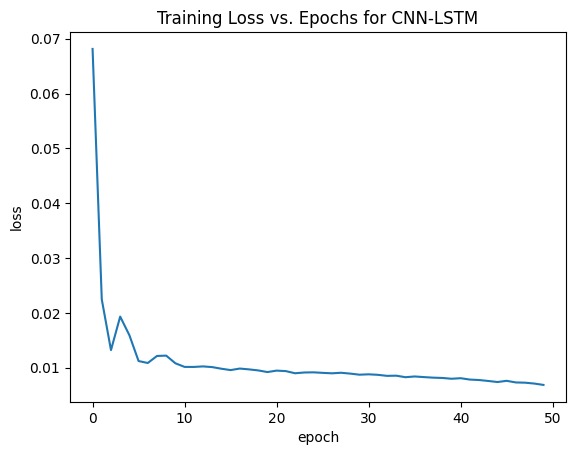

In [66]:
cnn_lstm_model.compile(optimizer="adam",loss=loss)
cnn_lstm_epochs = cnn_lstm_model.fit(X_train, y_train, epochs=epochs,
                                     batch_size=batch_size)
plot_training_loss(cnn_lstm_epochs, "CNN-LSTM")

## Evaluate CNN-LSTM Model using MAE, RMSE, and R2.

In [67]:
print("CNN-LSTM Predictions for Training Set")
cnn_lstm_pred_train = cnn_lstm_model.predict(X_train)
print("CNN-LSTM Predictions for Testing Set")
cnn_lstm_pred_test = cnn_lstm_model.predict(X_test)
cnn_lstm_mae = mean_absolute_error(y_test,cnn_lstm_pred_test)
print("MAE of CNN-LSTM model = ",cnn_lstm_mae)
cnn_lstm_rmse =  mean_squared_error(y_test,cnn_lstm_pred_test) ** 0.5
print("RMSE of CNN-LSTM model = ",cnn_lstm_rmse)
cnn_lstm_r2_score = r2_score(y_test, cnn_lstm_pred_test)
print("R^2 Score of CNN-LSTM model = ",cnn_lstm_r2_score)
cnn_lstm_mape_score = 100*mean_absolute_percentage_error(y_test,
                                                         cnn_lstm_pred_test)
print("MAPE Score of CNN-LSTM model = {0} %".format(cnn_lstm_mape_score))

CNN-LSTM Predictions for Training Set
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
CNN-LSTM Predictions for Testing Set
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MAE of CNN-LSTM model =  0.05599103382164514
RMSE of CNN-LSTM model =  0.0745614810896244
R^2 Score of CNN-LSTM model =  0.819048152396503
MAPE Score of CNN-LSTM model = 19815006601558.42 %


## Reverse Transform Scaler to Convert to Real Values.

In [68]:
y_train_inverse = scaler.inverse_transform(y_train.reshape(-1, 1))
cnn_lstm_pred_inv_train = scaler.inverse_transform(cnn_lstm_pred_train)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
cnn_lstm_pred_inv_test = scaler.inverse_transform(cnn_lstm_pred_test)

# Get values after inverse transformation.
y_train_inverse = y_train_inverse.flatten()
cnn_lstm_pred_inv_train = cnn_lstm_pred_inv_train.flatten()
y_test_inverse = y_test_inverse.flatten()
cnn_lstm_pred_inv_test = cnn_lstm_pred_inv_test.flatten()

## Showing Actual y and Predicted y values as Dataframes.

In [69]:
results_CNN_LSTM_train = pd.DataFrame({"Date":first_6169_index_dates,
                                 'Actual': y_train_inverse,
                                 'Predicted': cnn_lstm_pred_inv_train})
results_CNN_LSTM_train

,Date,Actual,Predicted
0,1749-01-31,166.046459,162.499008
1,1749-02-28,153.591035,164.599762
2,1749-03-31,152.418759,163.991196
3,1749-04-30,158.338749,164.309967
4,1749-05-31,155.701130,161.139145
...,...,...,...
2607,1966-04-30,173.959317,157.071075
2608,1966-05-31,172.054370,157.266556
2609,1966-06-30,167.951406,158.355179
2610,1966-07-31,159.745480,160.885361


In [70]:
# Now let's see our actual y and predicted y values as dataframes
results_CNN_LSTM_test = pd.DataFrame({"Date":last_6169_index_dates,
                                 'Actual': y_test_inverse,
                                 'Predicted': cnn_lstm_pred_inv_test})
results_CNN_LSTM_test

,Date,Actual,Predicted
0,1968-05-31,174.252386,163.182098
1,1968-06-30,167.277348,161.603027
2,1968-07-31,161.415972,161.792343
3,1968-08-31,166.867052,162.096970
4,1968-09-30,170.149422,162.017532
...,...,...,...
628,2020-09-30,121.675841,124.724380
629,2020-10-31,125.720191,124.947006
630,2020-11-30,131.464340,124.866081
631,2020-12-31,127.888900,125.127113


## Plotting Predictions for Transmitted/Received Bytes made by CNN-LSTM Model.

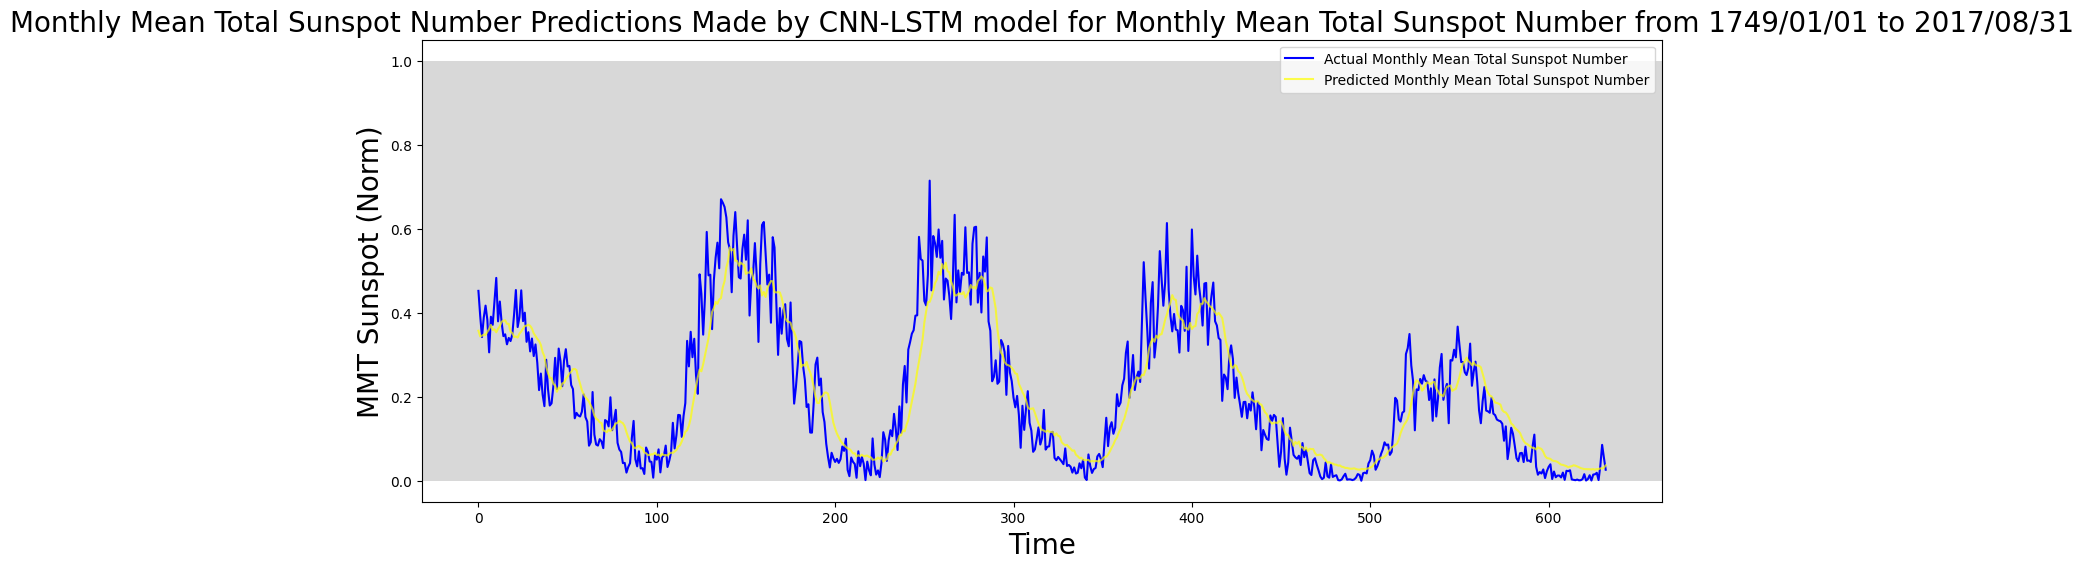

In [71]:
plt.figure(figsize=(16,6))
plt.plot(y_test, color='blue',label='Actual {0}'.format(feature))
plt.plot(cnn_lstm_pred_test, alpha=0.7, color='yellow', \
         label='Predicted {0}'.format(feature))
plt.axhspan(0, 1, facecolor='gray', alpha=0.3)
plt.title("{0} Predictions Made by CNN-LSTM model for {1}".
          format(feature, title_name), fontsize = 20)
plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=10)
#plt.ylim([40, 70])
plt.xlabel('Time', fontsize = 20)
plt.ylabel(feature_norm, fontsize = 20)
plt.legend()
plt.show()

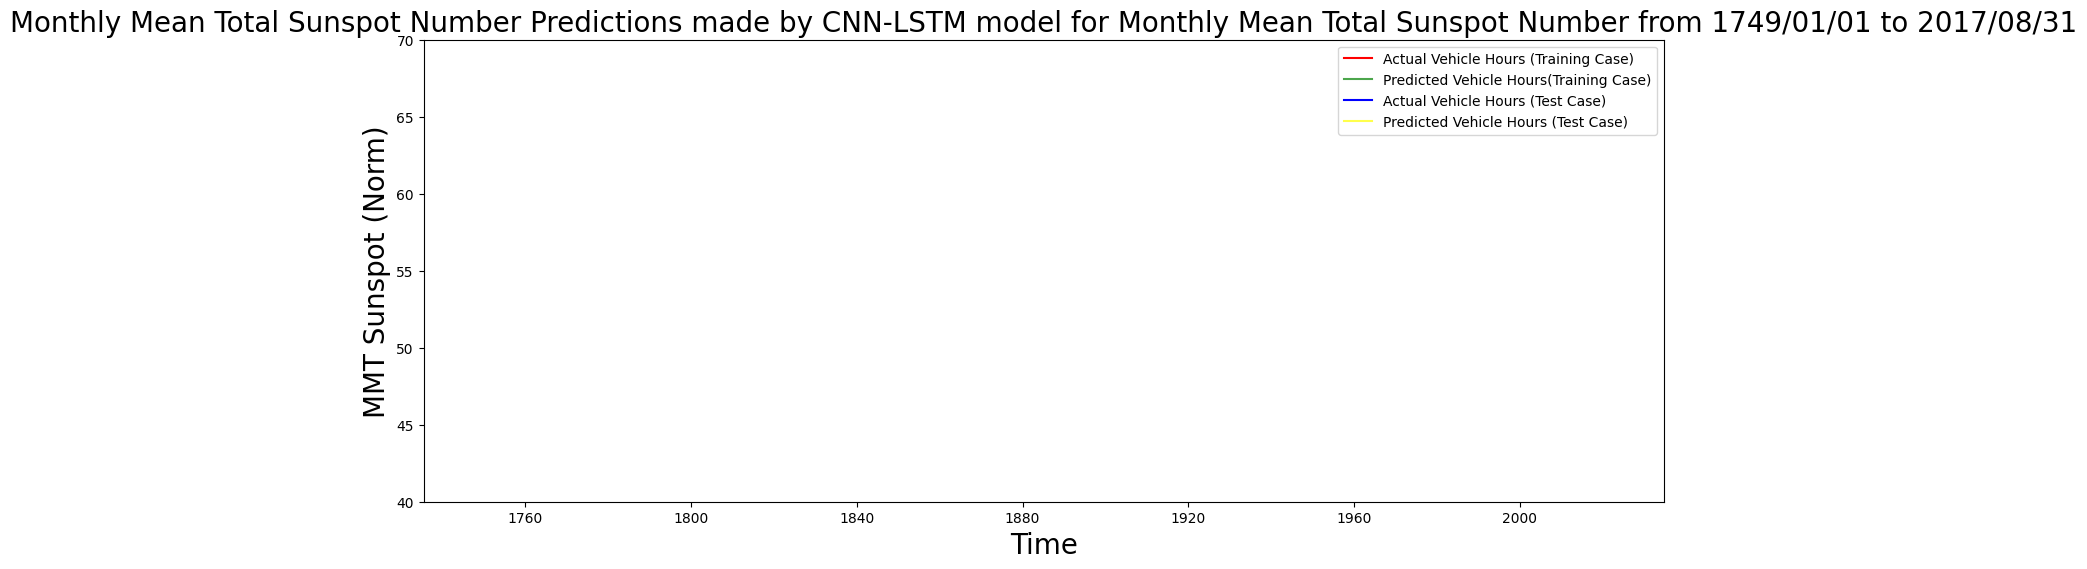

In [72]:
plt.figure(figsize=(16,6))
plt.plot(results_CNN_LSTM_train['Date'], results_CNN_LSTM_train['Actual'], color='red',
         label='Actual Vehicle Hours (Training Case)')
plt.plot(results_CNN_LSTM_train['Date'],  results_CNN_LSTM_train['Predicted'], alpha=0.7,
         color='green', label='Predicted Vehicle Hours(Training Case)')
plt.plot(results_CNN_LSTM_test['Date'], results_CNN_LSTM_test['Actual'], color='blue',
         label='Actual Vehicle Hours (Test Case)')
plt.plot(results_CNN_LSTM_test['Date'], results_CNN_LSTM_test['Predicted'], alpha=0.7, color='yellow',
         label='Predicted Vehicle Hours (Test Case)')
plt.axhspan(0, 1, facecolor='gray', alpha=0.3)
plt.title("{0} Predictions made by CNN-LSTM model for {1}".
          format(feature, title_name), fontsize = 20)
plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=10)
plt.ylim([40, 70])
plt.xlabel('Time', fontsize = 20)
plt.ylabel(feature_norm, fontsize = 20)
plt.legend()
plt.show()

## Combine Actual and Predicted Results for Train and Test Cases for CNN-LSTM.

In [73]:
results_CNN_LSTM = [results_CNN_LSTM_train, results_CNN_LSTM_test]
results_CNN_LSTM = pd.concat(results_CNN_LSTM)
display(results_CNN_LSTM)

,Date,Actual,Predicted
0,1749-01-31,166.046459,162.499008
1,1749-02-28,153.591035,164.599762
2,1749-03-31,152.418759,163.991196
3,1749-04-30,158.338749,164.309967
4,1749-05-31,155.701130,161.139145
...,...,...,...
628,2020-09-30,121.675841,124.724380
629,2020-10-31,125.720191,124.947006
630,2020-11-30,131.464340,124.866081
631,2020-12-31,127.888900,125.127113


## Plotting Residuals for Actual and Predicted Results for CNN-LSTM.

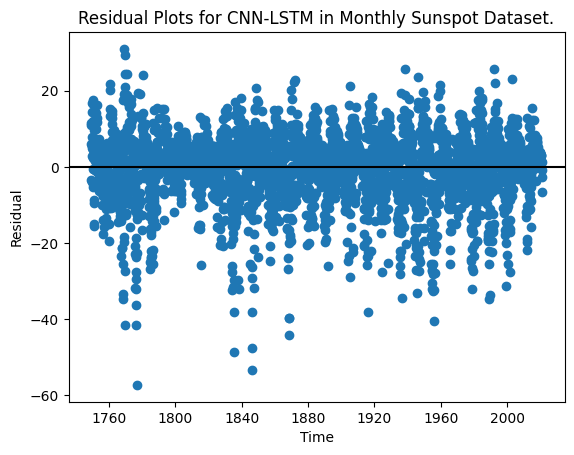

In [74]:
actual_arr_CNN_LSTM = np.array(results_CNN_LSTM['Actual'])
predicted_arr_CNN_LSTM = np.array(results_CNN_LSTM['Predicted'])
residuals_CNN_LSTM = predicted_arr_CNN_LSTM - actual_arr_CNN_LSTM
plt.scatter(results_CNN_LSTM['Date'], residuals_CNN_LSTM)
plt.axhline(y=0, color = 'black')
plt.title("Residual Plots for CNN-LSTM in Monthly Sunspot Dataset.")
#plt.locator_params(axis='x', nbins=10)
#plt.locator_params(axis='y', nbins=10)
#plt.ylim([40, 70])
plt.xlabel("Time")
plt.ylabel("Residual")
plt.show()

## Energy Consumption

In [75]:
# estimate model energy for cnn-lstm model
#energy_cnn_lstm = keras_spiking.ModelEnergy(cnn_lstm_model)
#energy_cnn_lstm.summary(print_warnings=False)

In [76]:
#energy_cnn_lstm.summary(
#    columns=(
#        "name",
#        "energy cpu",
#        "energy gpu",
#        "synop_energy cpu",
#        "synop_energy gpu",
#        "neuron_energy cpu",
#        "neuron_energy gpu",
#    ),
#    print_warnings=False,
#)

# Forecasting Future Data for all models

## Essential Functions.

In [77]:
# this section for unknown future.
future=20
#future=seq_len
forecast_LSTM = []
forecast_DSNN = []
forecast_CNN_LSTM = []

In [78]:
def insert_end(Xin, new_input, timestep):
    for i in range(timestep-1):
        Xin[:,i,:] = Xin[:,i+1,:]
    Xin[:,timestep-1,:] = new_input
    return Xin

def forecast_data(Xin, model_type, forecast, future_num):
    time=[]
    data_pts = future_num
    for j in range(data_pts):
      out = model_type.predict(Xin, batch_size=1000)
      forecast.append(out[j, 0])
      Xin = insert_end(Xin, out[j, 0], future_num)
      time_current = pd.to_datetime(df_norm.index[-1])+timedelta(days=30*j)
      if (j % 100 == 0):
        print("j = {0}".format(j))
        print("forecast: {0}".format(forecast))
        print("time_current: ",  time_current)
      time.append(time_current)


    forcasted_output=np.asanyarray(forecast)
    forcasted_output=forcasted_output.reshape(-1,1)
    forcasted_output = scaler.inverse_transform(forcasted_output)
    forcasted_output = pd.DataFrame(forcasted_output)
    date = pd.DataFrame(time)
    forecast_result = pd.concat([date, forcasted_output],axis=1)
    forecast_result.columns = "Date","Forecasted"

    return forecast_result

In [79]:
# Plotting Predictions for Transmitted/Received Bytes made by Vanilla RNN Model.
def plot_forecast(forecast_set, model_name, mode, min=140, max=165):
    plt.figure(figsize=(16,6))
    plt.plot(forecast_set['Date'], forecast_set['Forecasted'], alpha=0.7,
             color='teal', label='Forecasted {0}'.format(feature))
    plt.axhspan(0, 1, facecolor='gray', alpha=0.3)
    plt.title('{0} Forecast for {1} using {2}'.
              format(feature_field, mode, model_name), fontsize = 15)
    plt.locator_params(axis='x', nbins=10)
    plt.locator_params(axis='y', nbins=10)
    #plt.ylim([40, 70])
    plt.xlabel('Time', fontsize = 20)
    plt.ylabel(feature_field, fontsize = 20)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.legend()
    plt.show()

In [80]:
# Plotting Predictions for Vehicle Hours/Miles.
def plot_with_forecast(train_set, test_set, forecast_set, model_name,
                       mode):
    plt.figure(figsize=(16,6))
    plt.plot(train_set['Date'], train_set['Actual'], color='red',
             label='Actual {0} (Training Case)'.format(feature))
    plt.plot(train_set['Date'], train_set['Predicted'], alpha=0.7,
             color='green',
             label='Predicted {0} (Training Case)'.format(feature))
    plt.plot(test_set['Date'], test_set['Actual'], color='blue',
            label='Actual {0} (Test Case)'.format(feature))
    plt.plot(test_set['Date'], test_set['Predicted'], alpha=0.7, color='yellow',
             label='Predicted {0} (Test Case)'.format(feature))
    plt.plot(forecast_set['Date'], forecast_set['Forecasted'], alpha=0.7,
             color='teal', label='Forecasted {0}'.format(feature))
    plt.axhspan(0, 1, facecolor='gray', alpha=0.3)
    plt.title("{0} Predictions and Forecasts made by {1} model for {2}".
              format(feature_field, model_name, title_name), fontsize = 15)
    plt.locator_params(axis='x', nbins=10)
    plt.locator_params(axis='y', nbins=10)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    #plt.ylim([1052, 1054])
    plt.xlabel('Time', fontsize = 15)
    plt.ylabel('Normalized {0} Scale'.format(feature_field), fontsize = 15)
    plt.legend()
    plt.show()

## Forecasting Future Data for LSTM.

In [81]:
Xin = X_test[:,:,:]
Xin

array([[[0.17855349],
        [0.20391763],
        [0.20341537],
        ...,
        [0.39804119],
        [0.32772476],
        [0.2887996 ]],

       [[0.20391763],
        [0.20341537],
        [0.25062783],
        ...,
        [0.32772476],
        [0.2887996 ],
        [0.45203415]],

       [[0.20341537],
        [0.25062783],
        [0.39427423],
        ...,
        [0.2887996 ],
        [0.45203415],
        [0.39226519]],

       ...,

       [[0.02360623],
        [0.02285284],
        [0.02486188],
        ...,
        [0.01883476],
        [0.00150678],
        [0.03616273]],

       [[0.02285284],
        [0.02486188],
        [0.00301356],
        ...,
        [0.00150678],
        [0.03616273],
        [0.08538423]],

       [[0.02486188],
        [0.00301356],
        [0.00226017],
        ...,
        [0.03616273],
        [0.08538423],
        [0.05474636]]])

In [82]:
#Xin_reshaped_LSTM = Xin.reshape(Xin.shape[0], Xin.shape[2], 1)
forecast_result_lstm = forecast_data(Xin, lstm_model, forecast_LSTM, future)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
j = 0
forecast: [0.33894867]
time_current:  2021-01-31 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


In [83]:
forecast_result_lstm

,Date,Forecasted
0,2021-01-31,161.055313
1,2021-03-02,161.461960
2,2021-04-01,161.738907
3,2021-05-01,161.231171
4,2021-05-31,160.313080
5,2021-06-30,159.442062
6,2021-07-30,158.338882
7,2021-08-29,156.200531
8,2021-09-28,155.824768
9,2021-10-28,155.133453


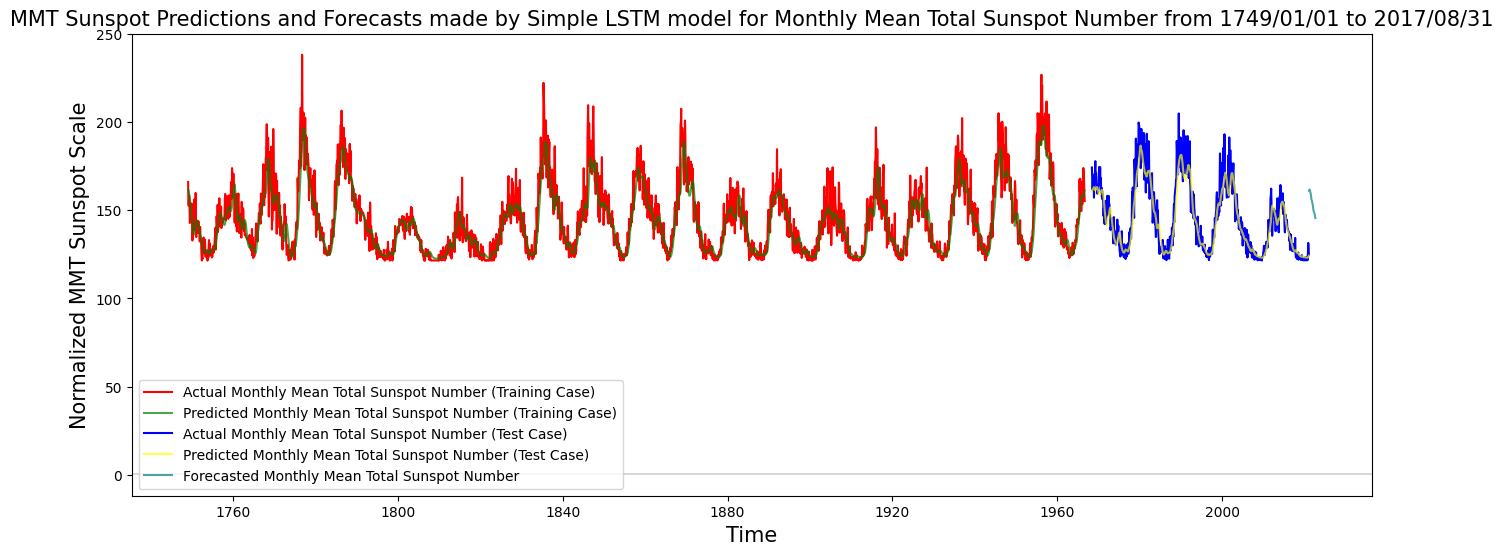

In [84]:
# Plot Forecast combined with Training and Testing Data.
plot_with_forecast(results_LSTM_train, results_LSTM_test, forecast_result_lstm,
                   'Simple LSTM', title_name)

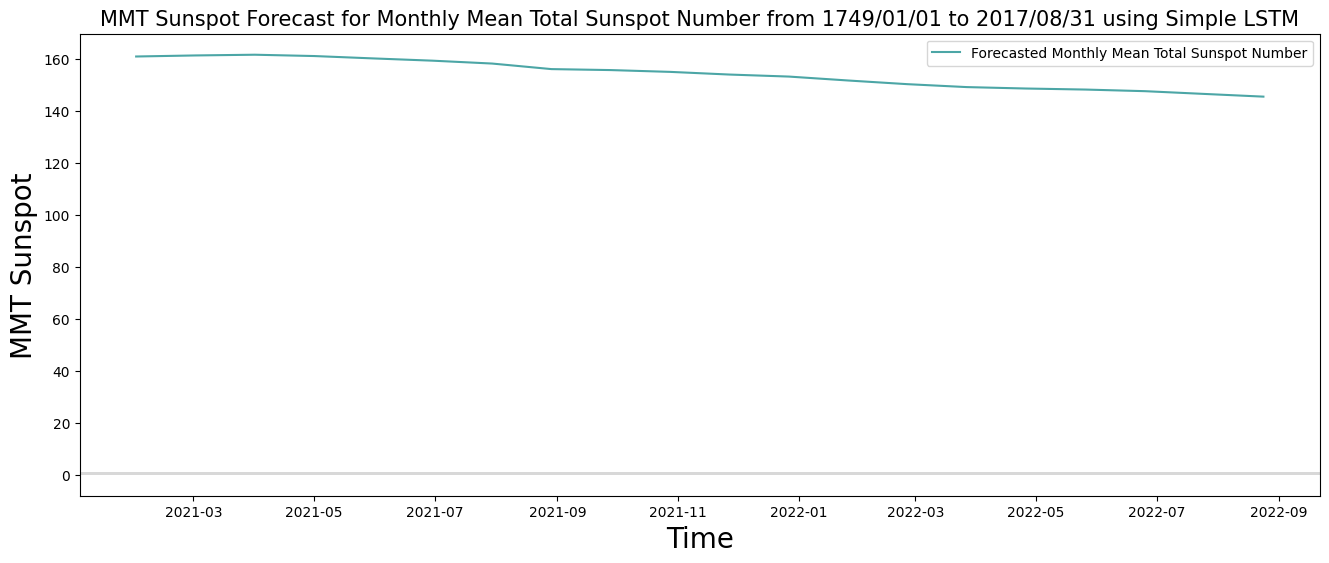

In [85]:
# Only Forecast Data for closer look.
plot_forecast(forecast_result_lstm, 'Simple LSTM', title_name)

## Forecasting Future Data for Dense SNN.

In [86]:
forecast_result_DSNN = forecast_data(Xin, spiking_model,
                                      forecast_DSNN, future)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
j = 0
forecast: [0.15290684]
time_current:  2021-01-31 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [87]:
forecast_result_DSNN

,Date,Forecasted
0,2021-01-31,139.344223
1,2021-03-02,139.344223
2,2021-04-01,139.344223
3,2021-05-01,139.344223
4,2021-05-31,139.344223
5,2021-06-30,139.344223
6,2021-07-30,139.344223
7,2021-08-29,139.344223
8,2021-09-28,139.344223
9,2021-10-28,139.344223


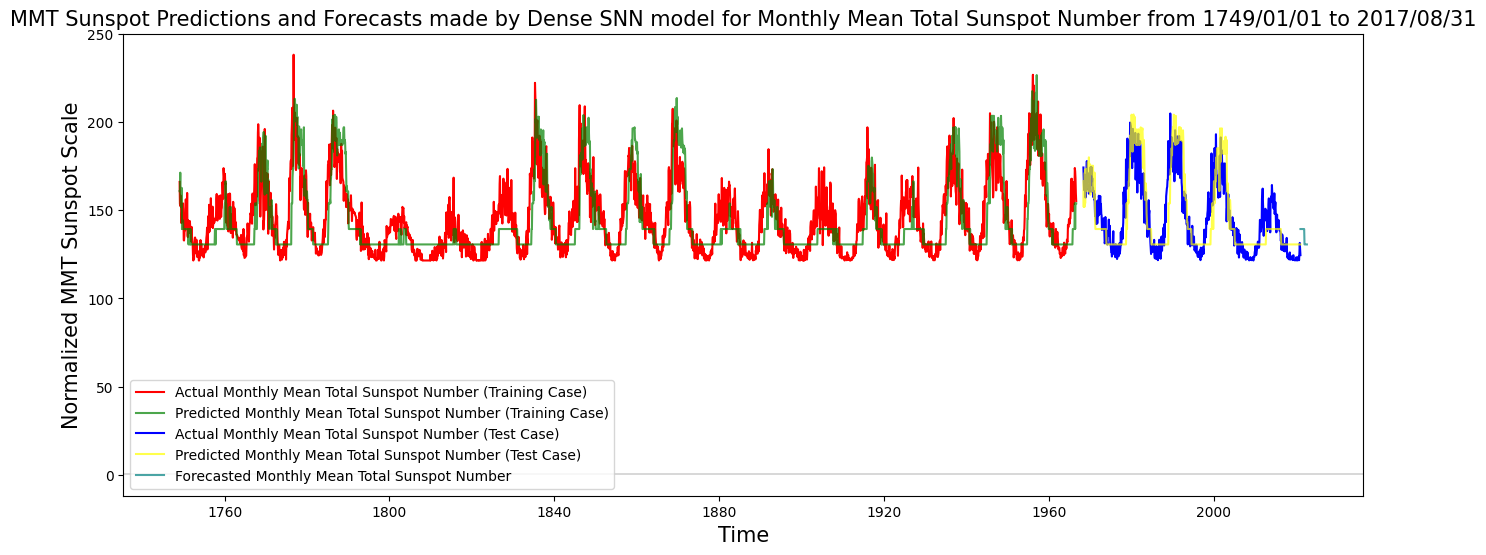

In [88]:
# Plot Forecast combined with Training and Testing Data.
plot_with_forecast(results_SNN_train, results_SNN_test,
                   forecast_result_DSNN , 'Dense SNN', title_name)

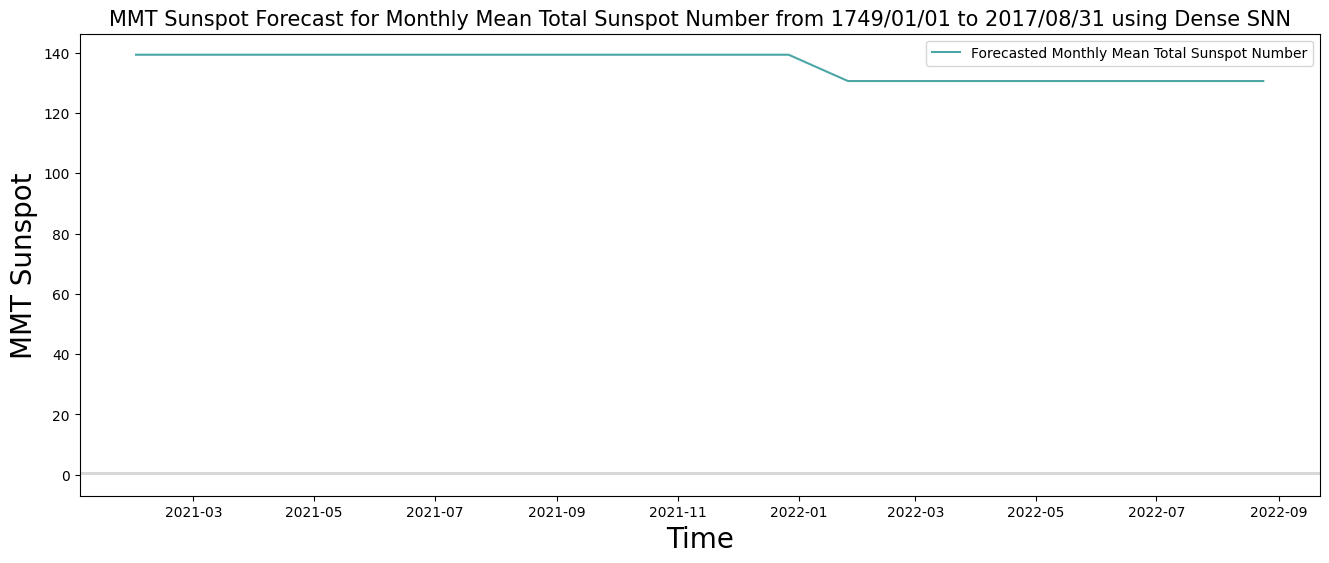

In [89]:
# Only Forecast Data for closer look.
plot_forecast(forecast_result_DSNN, 'Dense SNN', title_name)

## Forecasting Future Data for CNN-LSTM

In [90]:
forecast_result_cnn_lstm = forecast_data(Xin, cnn_lstm_model, forecast_CNN_LSTM,
                                         future)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
j = 0
forecast: [0.11100374]
time_current:  2021-01-31 00:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [91]:
forecast_result_cnn_lstm

,Date,Forecasted
0,2021-01-31,134.454147
1,2021-03-02,133.750687
2,2021-04-01,133.585953
3,2021-05-01,133.813583
4,2021-05-31,133.927567
5,2021-06-30,133.965393
6,2021-07-30,134.143829
7,2021-08-29,134.552460
8,2021-09-28,134.670959
9,2021-10-28,134.807068


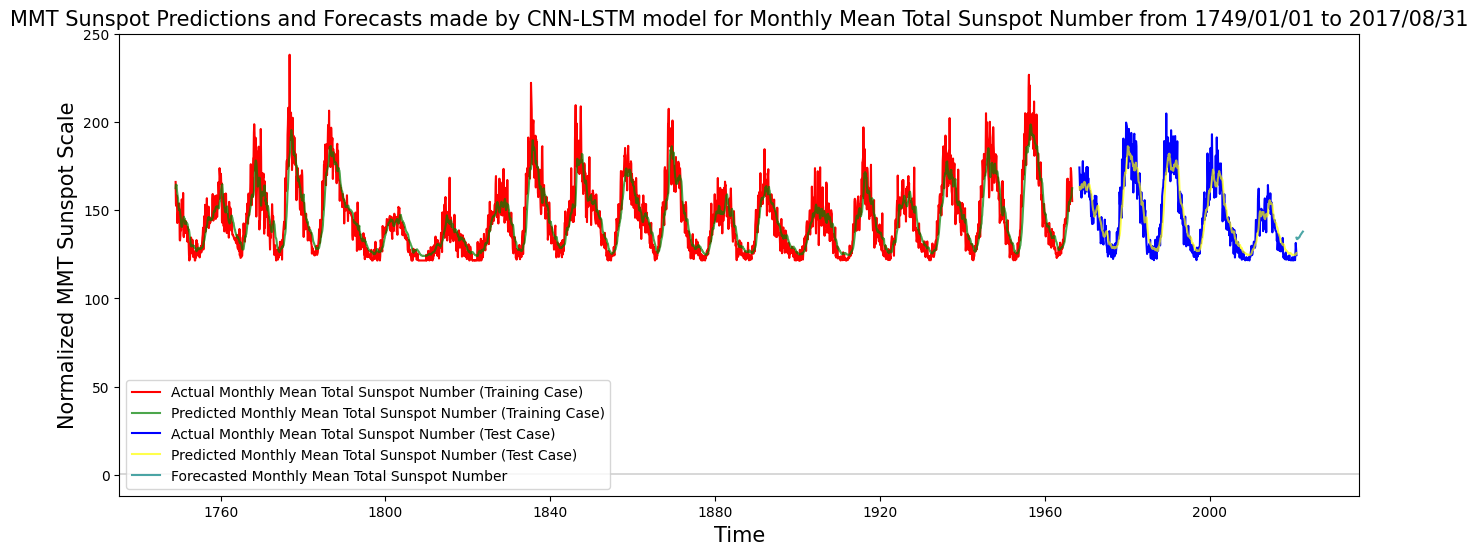

In [92]:
# Plot Forecast combined with Training and Testing Data.
plot_with_forecast(results_CNN_LSTM_train, results_CNN_LSTM_test,
                   forecast_result_cnn_lstm , 'CNN-LSTM', title_name)

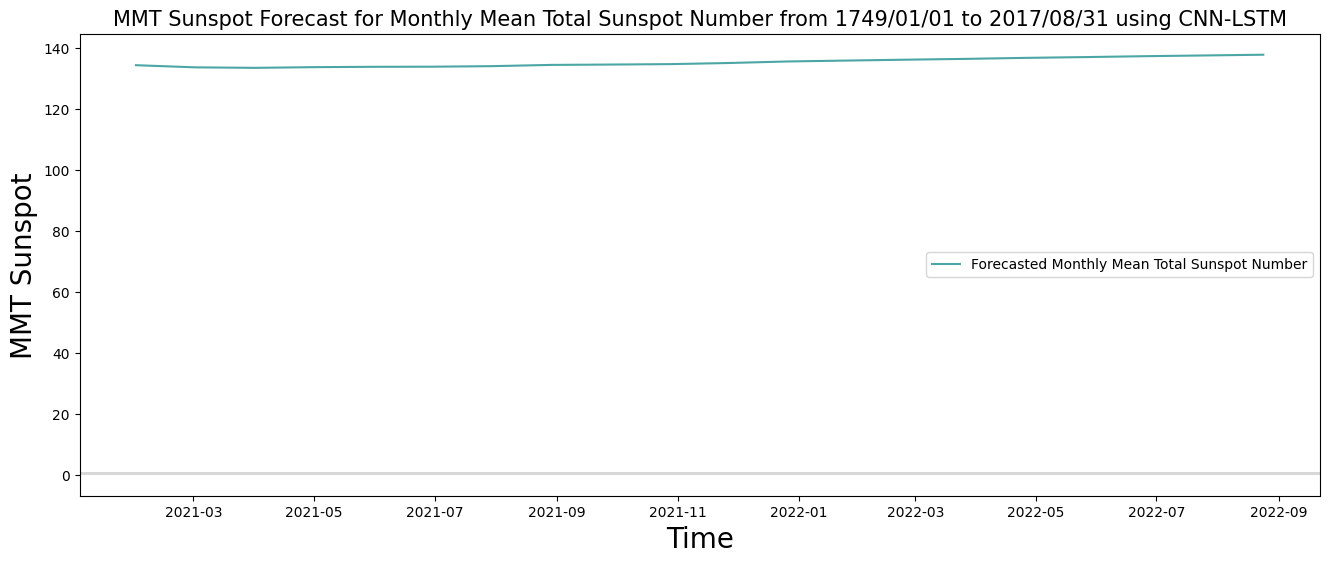

In [93]:
# Only Forecast Data for closer look.
plot_forecast(forecast_result_cnn_lstm, 'CNN-LSTM', title_name)

# Creating a pickle file for all classifier models.

## Mount model_pkl folder.

In [94]:
#os.chdir('/content/drive/My Drive/VT/Research/ap_datasets/model_pkl')

## Send model to pkl file.

In [95]:
#filename_lstm = 'TSC_sunset-prediction-lstm-model.pkl'
#pickle.dump(lstm_model, open(filename_lstm, 'wb'))